<a href="https://colab.research.google.com/github/bignamu/algorithmPython/blob/main/Chap17_Spring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KOCW 강좌

* 데이터베이스 예제 프로그래밍


# 강의 홈페이지

https://bwoh.github.io/

https://bwoh.github.io/categories/동영상-강의/데이터베이스-예제-프로그래밍/
> https://bit.ly/2XnFZaK

https://bwoh.github.io/2021/01/10/dbex/Chap-17-Spring/

> https://bit.ly/3pKdwZt

# Spring 개요


## 구조


* Request
* API Layer/Controller Layer
  * HTTP (GET, POST 등)
* Service Layer
  * 비즈니스 로직
* Data Access Layer
  * 데이터베이스
  * 한 줄만 바꾸면 사용할 데이터베이스 변경 가능

## POM (Project Object Model)

* pom.xml 파일
* 프로젝트가 어떻게 구성되는지 기술
  * 개발 환경
  * 의존성 (필요한 구성 요소)
    * A를 사용하고 있다면 A가 변경되면 현재 프로젝트도 변경되어야 하므로 의존적(dependent)


# GitHub Repository 생성 (Goorm IDE에서 Spring Stack 선택하면 Github 연결이 되지 않았음)

* github.com 가입 및 e-mail 인증
* Repositories에서 New 버튼 클릭

* Repository 이름은 spring-gunpladb

* 공부를 위한 연습용일 때는 Private 선택
  * 강의를 위해서 Public 선택하겠으니 나중에 clone해서 다운로드하실 수 있음
* README file 추가 체크
* .gitignore는 git 버전 관리에서 제외할 폴더 및 파일 지정하기 위한 용도로 체크
  * Java Template 선택
* Create repository 버튼 클릭


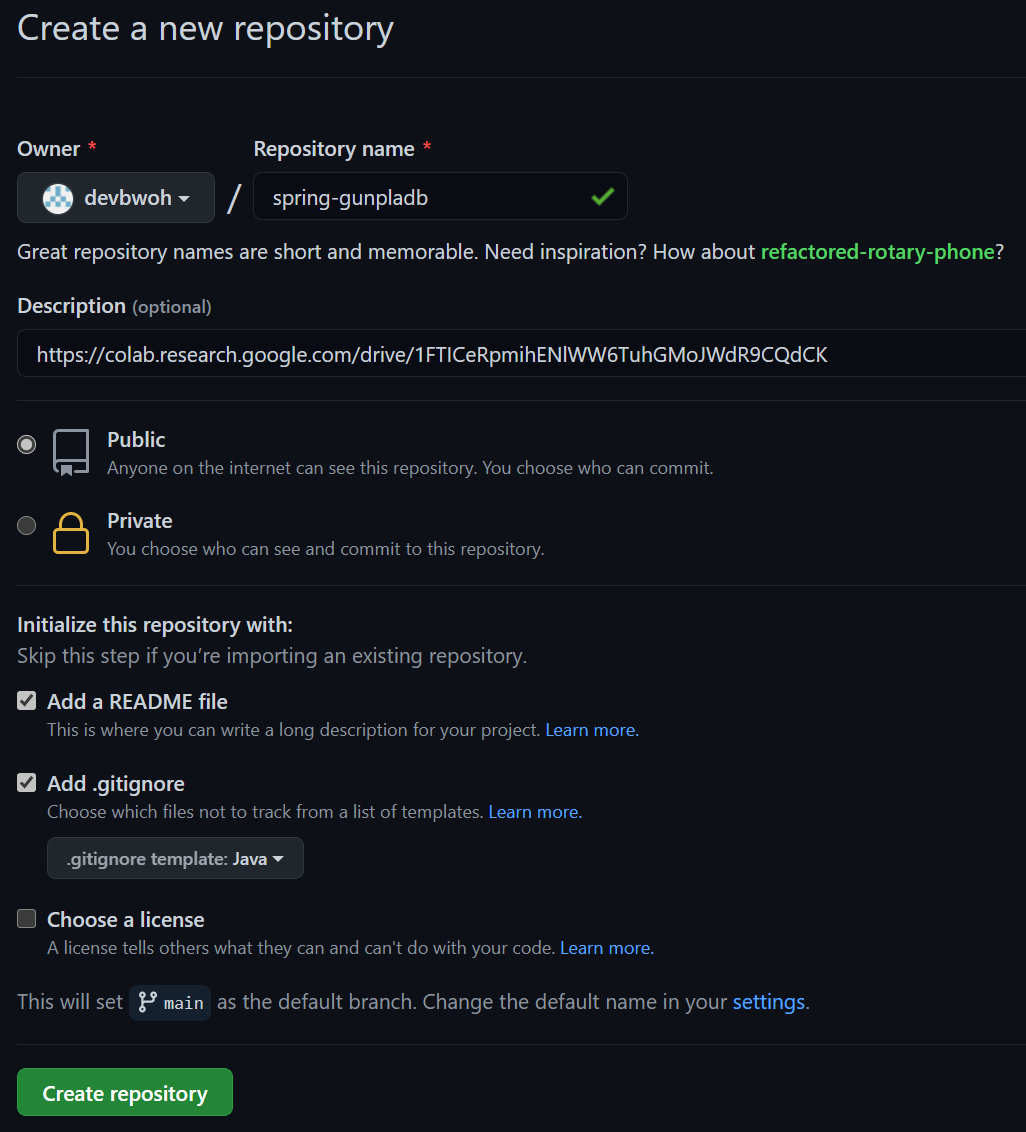

* Repository 생성됨
* About에는 Google CoLab 주소 넣어 두었음
* Public으로 만들어 두었으므로 GitHub.com에서 볼 수 있음
> https://github.com/devbwoh/spring-gunpladb

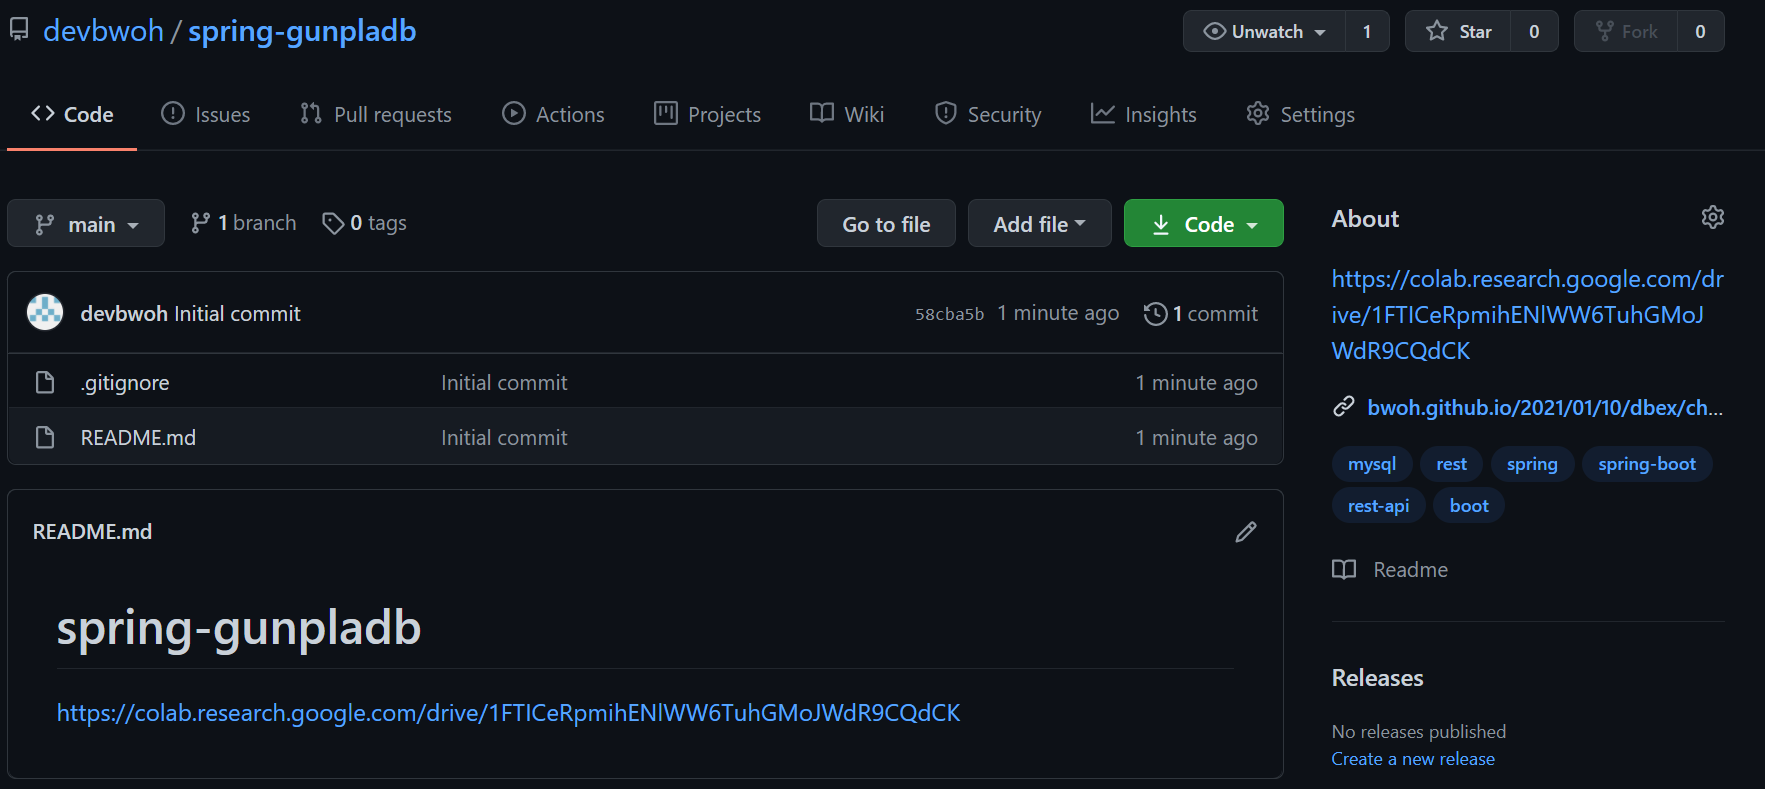

# Goorm IDE 컨테이너 생성

* 1장을 학습하지 않으신 분들은 아래 링크 가입 방법 참조
> https://colab.research.google.com/drive/17nWRurzKbBGG6xrW6AkMqIfOTULZvdxV#scrollTo=VhEoZ2ZhouFF

* Goorm IDE 접속
> https://ide.goorm.io

* 오른쪽 위 대시보드 버튼 클릭

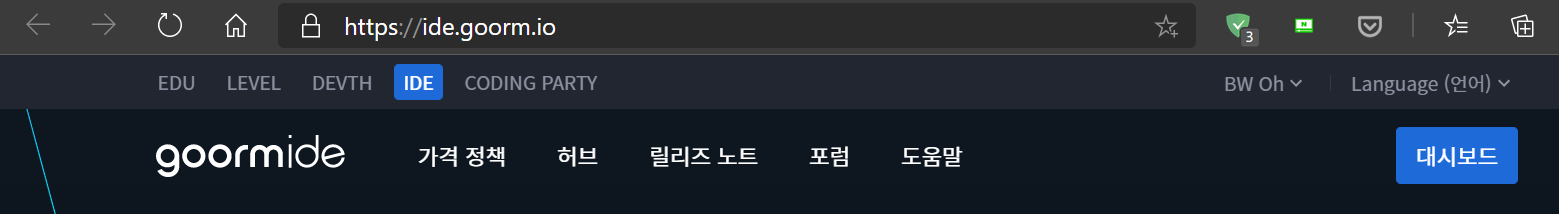

* `+ 새 컨테이너` 버튼 클릭

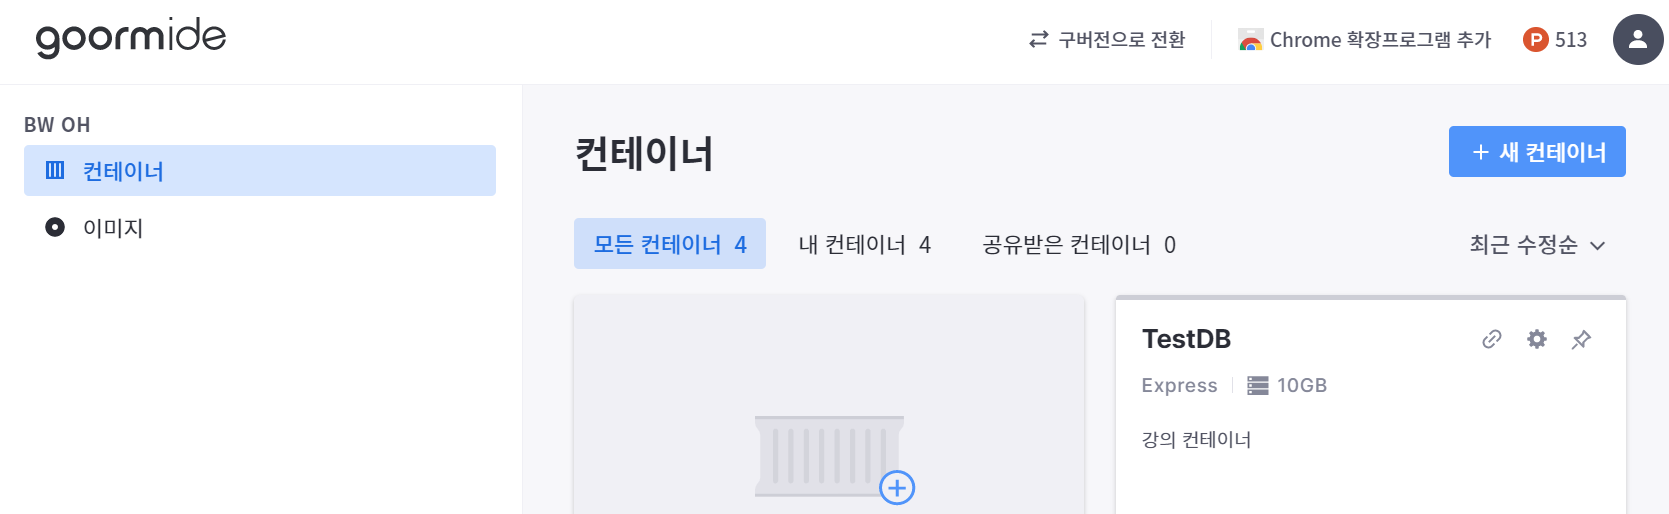

## 컨테이너 생성
* 이름: SpringGunplaDB
* 설명: 원하는 내용 적을 것
* 공개 범위: Private
* 템플릿: Github
* Github 인증하기 버튼 클릭
  * 생성한 Github repository 선택
  * Sprint Boot 스택에서 Github 연결 안되었음


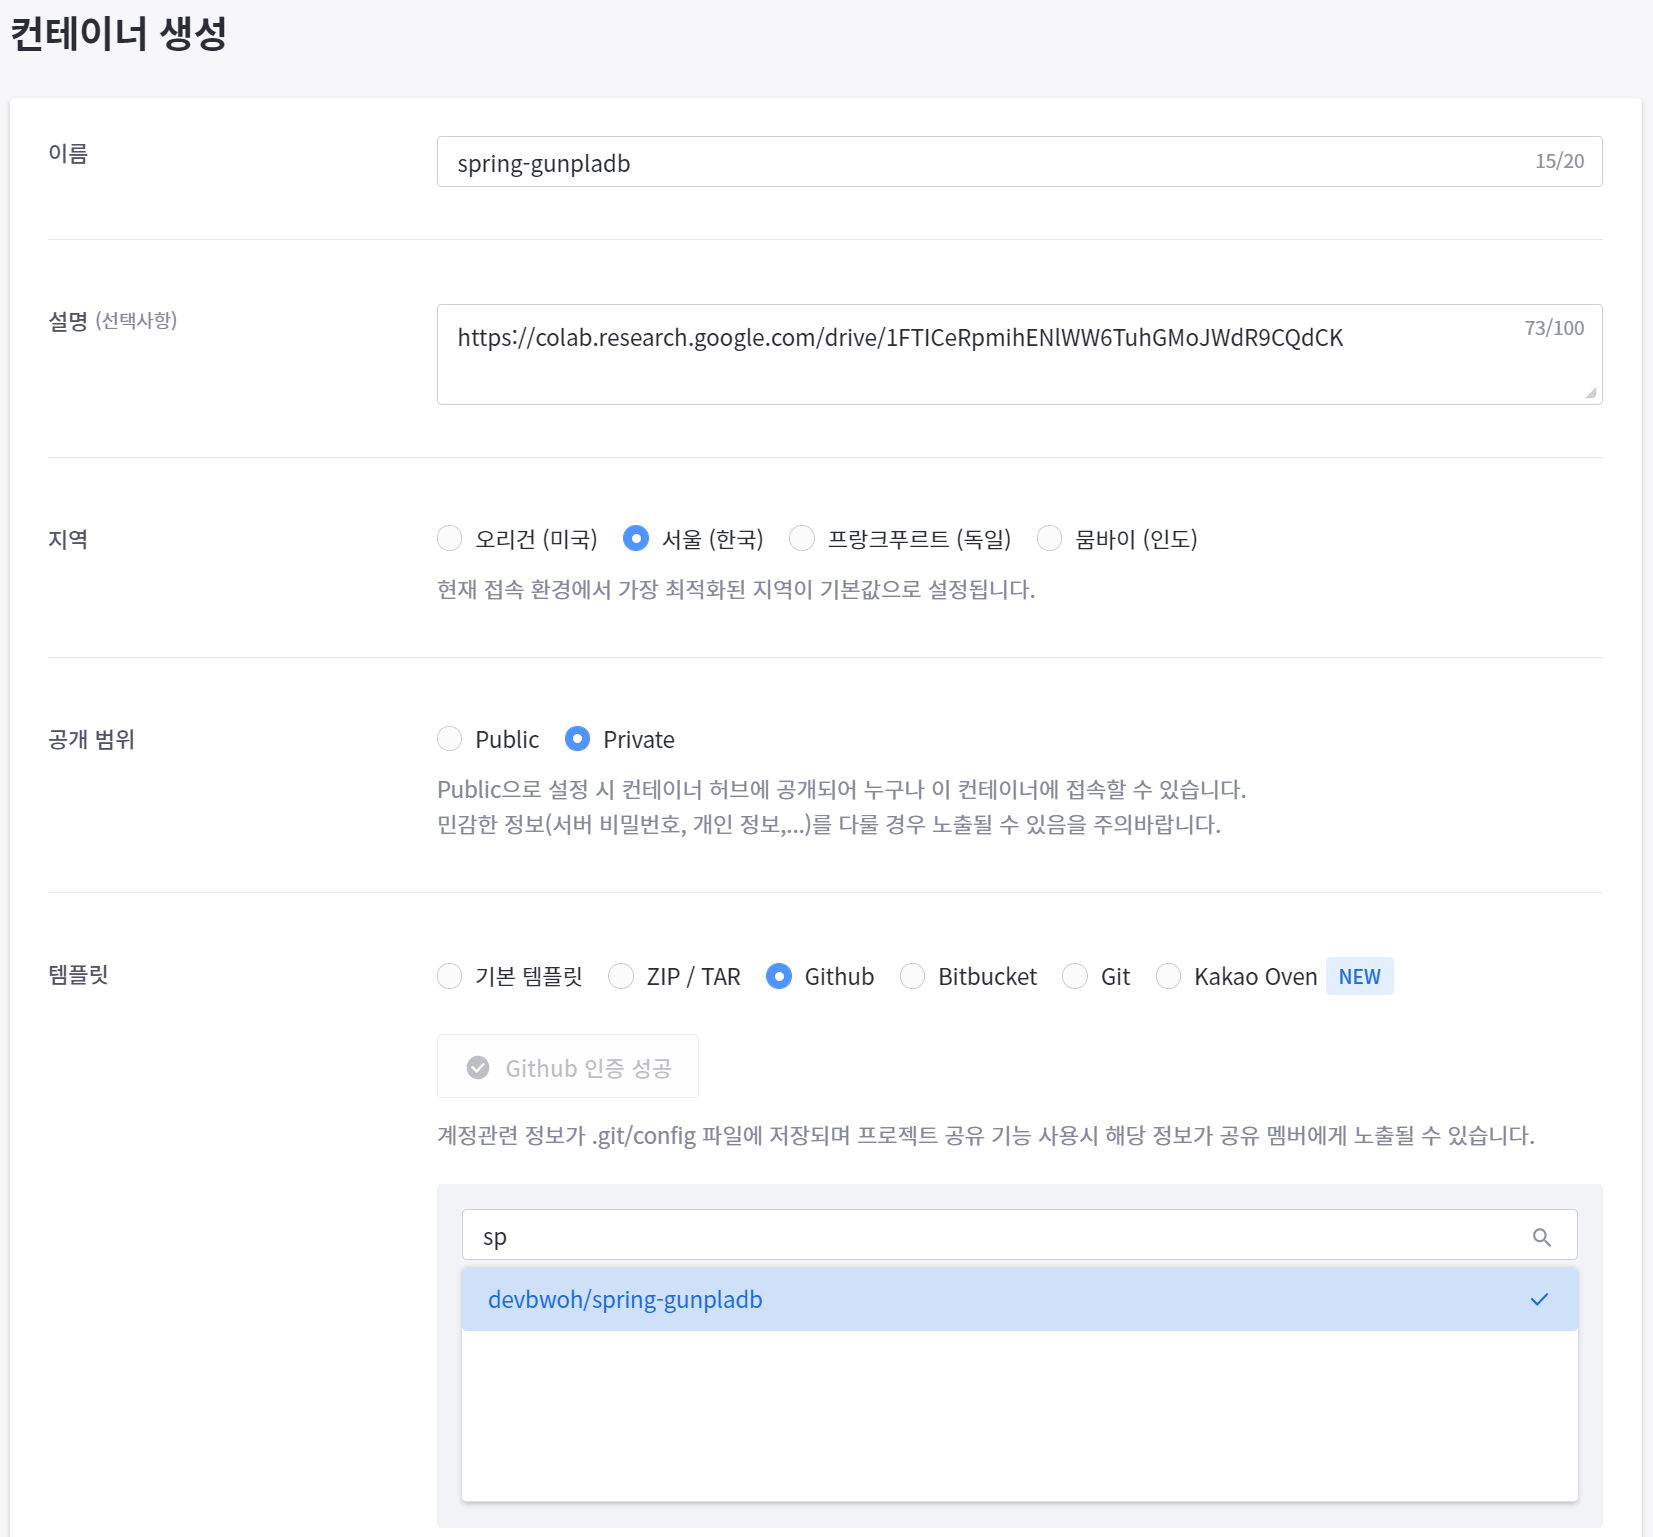

* 이전에 Github 인증한 적이 없고 처음이면 다음 화면 출력됨
* Authorize goormist 버튼 클릭

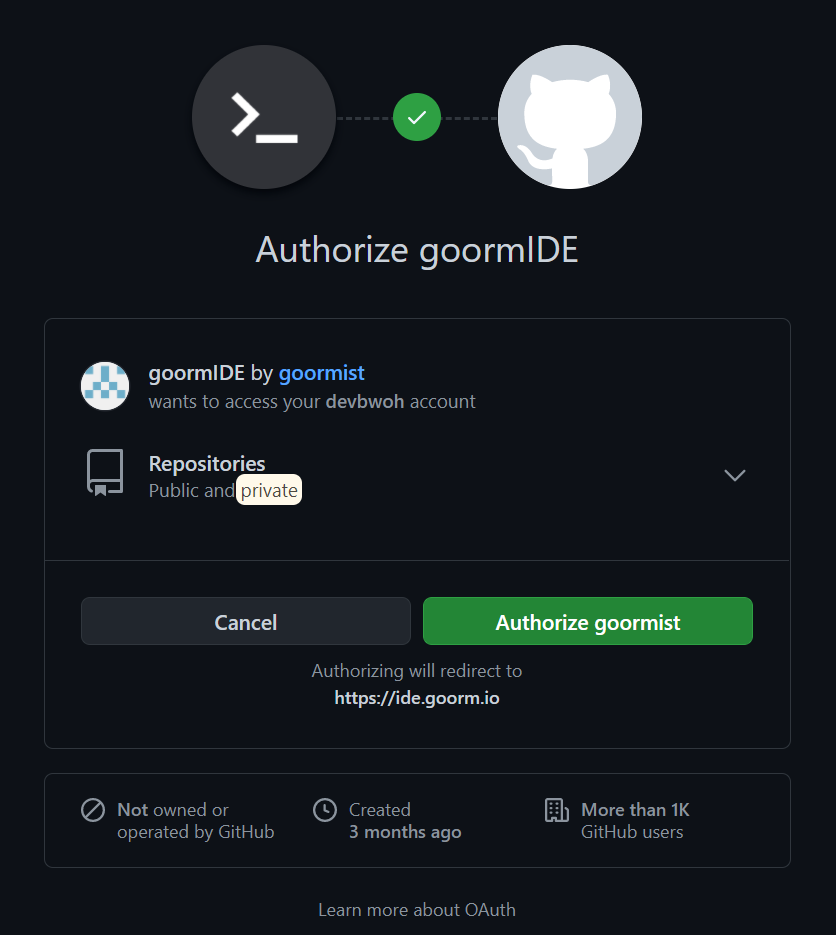

* 인증 성공
* 본인의 Repository들이 출력되면 이 컨테이너에 사용할 것 선택
  * 강의를 진행하기 위해서는 본인의 repository 선택할 것

* 소프트웨어 스택에서 Spring Boot 선택
* 밑에 있는 추가 모듈/패키지에서 MySQL 설치 체크
* 생성 버튼 클릭

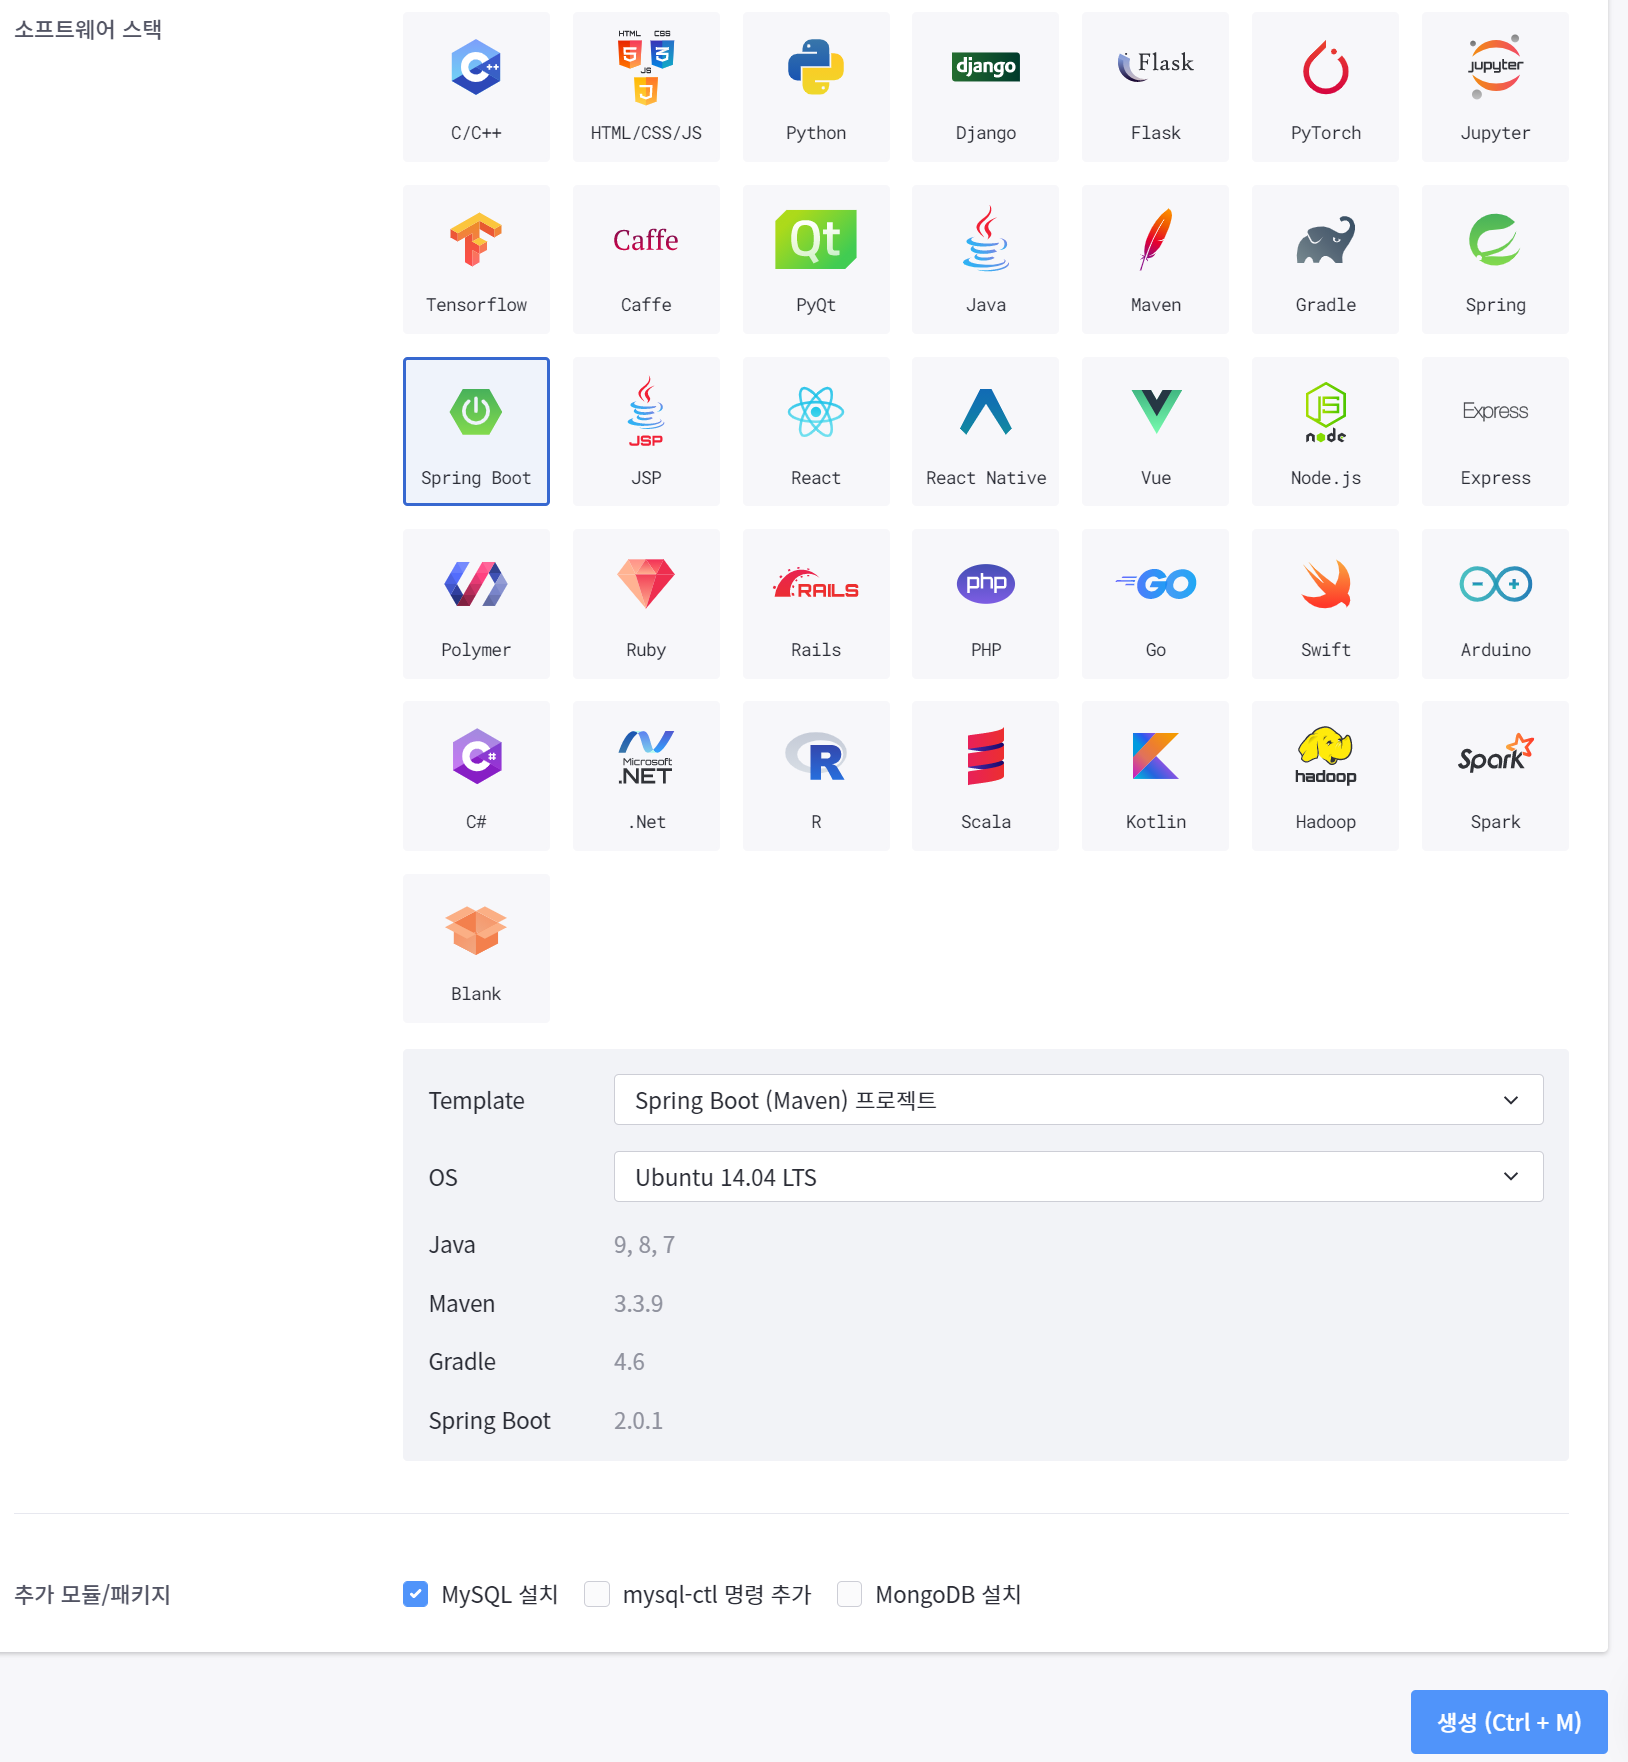

# Git에 대한 이해 필요

* 11장 PHP 강의의 Git 설명 부분 참조
* Git이 뭔지 모른다면 아래 링크 클릭하여 목차에서 "여기서 잠깐! Git이란" 보고 올 것
> https://colab.research.google.com/drive/1uRPwEjcABy2uYWAyuSKL2JhFtZ4OkfAV#scrollTo=W-VdXYxvayCr


# 데이터베이스 구축


* SpringGunplDB 폴더에 database.sql 파일 생성
* 프로젝트 디렉토리 상위 디렉토리
  * 본 예제에서는 workspace/SpringGunpladb/database.sql

* 아래의 코드를 database.sql 파일에 복사/붙여넣기
* 저장

In [ ]:

set PASSWORD for 'root'@'localhost'=PASSWORD('mysql1234');

#####
DROP DATABASE IF EXISTS `gunpladb` ;

CREATE DATABASE IF NOT EXISTS `gunpladb` 
  DEFAULT CHARACTER SET utf8 
  DEFAULT COLLATE utf8_general_ci;

USE `gunpladb` ;

CREATE TABLE `mechanic` (
  `id` INT NOT NULL AUTO_INCREMENT,
  `name` VARCHAR(255) NOT NULL,
  `model` VARCHAR(100) NOT NULL,
  `manufacturer` VARCHAR(255) NULL,
  `armor` VARCHAR(255) NULL,
  `height` DECIMAL(7,2) NULL,
  `weight` DECIMAL(7,2) NULL,
  PRIMARY KEY (`id`)
) ENGINE = InnoDB
  DEFAULT CHARACTER SET utf8 
  DEFAULT COLLATE utf8_general_ci;

CREATE TABLE `gunpla` (
  `id` INT NOT NULL AUTO_INCREMENT,
  `mechanic_id` INT NOT NULL,
  `grade` VARCHAR(45) NOT NULL,
  `date` DATE NULL,
  `price` INT(11) NULL,
  `title` VARCHAR(255) NULL,
  `boxart` VARCHAR(2083) NULL,
  PRIMARY KEY (`id`),
  INDEX (`mechanic_id`),
  FOREIGN KEY (`mechanic_id`) REFERENCES `mechanic` (`id`)
    ON DELETE CASCADE ON UPDATE CASCADE
) ENGINE = InnoDB
  DEFAULT CHARACTER SET utf8 
  DEFAULT COLLATE utf8_general_ci;

CREATE TABLE `image` (
  `id` INT NOT NULL AUTO_INCREMENT,
  `gunpla_id` INT NOT NULL,
  `filename` VARCHAR(255) NOT NULL,
  `description` TEXT NULL,
  PRIMARY KEY (`id`),
  INDEX (`gunpla_id`),
  FOREIGN KEY (`gunpla_id`) REFERENCES `gunpla` (`id`)
    ON DELETE CASCADE ON UPDATE CASCADE
) ENGINE = InnoDB
  DEFAULT CHARACTER SET utf8 
  DEFAULT COLLATE utf8_general_ci;

CREATE TABLE `armament` (
  `id` INT NOT NULL AUTO_INCREMENT,
  `name` VARCHAR(255) NULL,
  `description` TEXT NULL,
  `image` VARCHAR(2083) NULL,
  PRIMARY KEY (`id`)
) ENGINE = InnoDB
  DEFAULT CHARACTER SET utf8 
  DEFAULT COLLATE utf8_general_ci;

CREATE TABLE `equipment` (
  `mechanic_id` INT NOT NULL,
  `armaments_id` INT NOT NULL,
  PRIMARY KEY (`mechanic_id`, `armaments_id`),
  INDEX (`armaments_id`),
  FOREIGN KEY (`mechanic_id`) REFERENCES `mechanic` (`id`)
    ON DELETE CASCADE ON UPDATE CASCADE,
  FOREIGN KEY (`armaments_id`) REFERENCES `armament` (`id`)
    ON DELETE CASCADE ON UPDATE CASCADE
) ENGINE = InnoDB
  DEFAULT CHARACTER SET utf8 
  DEFAULT COLLATE utf8_general_ci;

CREATE TABLE `pilot` (
  `id` INT NOT NULL AUTO_INCREMENT,
  `name` VARCHAR(255) NOT NULL,
  `alias` VARCHAR(255) NULL,
  `type` VARCHAR(100) NULL,
  `nationality` VARCHAR(100) NULL,
  `image` VARCHAR(2083) NULL,
  PRIMARY KEY (`id`)
) ENGINE = InnoDB
  DEFAULT CHARACTER SET utf8 
  DEFAULT COLLATE utf8_general_ci;

CREATE TABLE `boarding` (
  `mechanic_id` INT NOT NULL,
  `pilot_id` INT NOT NULL,
  PRIMARY KEY (`mechanic_id`, `pilot_id`),
  INDEX (`pilot_id`),
  FOREIGN KEY (`mechanic_id`) REFERENCES `mechanic` (`id`)
    ON DELETE CASCADE ON UPDATE CASCADE,
  FOREIGN KEY (`pilot_id`) REFERENCES `pilot` (`id`)
    ON DELETE CASCADE ON UPDATE CASCADE
) ENGINE = InnoDB
  DEFAULT CHARACTER SET utf8 
  DEFAULT COLLATE utf8_general_ci;


###############################################

INSERT INTO mechanic (id, name, model, manufacturer, armor, height, weight) VALUES
  (1, '건담', 'RX-78-2', 'Earth Federation', 'Luna Titanium', 18.0, 43.4),
  (2, '건캐논', 'RX-77-2', 'Earth Federation', 'Luna Titanium', 17.5, 51.0),
  (3, '건탱크', 'RX-75', 'Earth Federation', 'Luna Titanium', 15.0, 56.0),
  (4, '짐', 'RGM-79', 'Earth Federation Forces', 'Titanium Alloy', 18.0, 41.2),
  (5, '자쿠 II', 'MS-06F', 'Zeonic Company', 'Super Hard Steel Alloy', 17.5, 58.1),
  (6, '샤아 전용 자쿠 II', 'MS-06S', 'Zeonic Company', 'Super Hard Steel Alloy', 17.5, 56.5),
  (7, '돔', 'MS-09B', 'Zimmad Company', 'Super Hard Steel Alloy', 18.6, 62.6),
  (8, '릭 돔', 'MS-09R', 'Zimmad Company', 'Super Hard Steel Alloy', 18.6, 43.8),
  (9, '즈고크 E', 'MSM-07E', 'MIP Company', 'Titanium Alloy Ceramic Composite', 18.4, 69.5),
  (10, '씨그', 'ZGMF-515', 'Zodiac Alliance of Freedom Treaty', null, 21.43, 80.22),
  (11, '거너 자쿠 워리어', 'ZGMF-1000/A1', 'Integrated Design Bureau', null, 20.50, 91.11),
  (12, '건담 5호기', 'RX-78-5', 'Earth Federation', 'Luna Titanium', 18.0, 42.9),
  (13, '건담 Mk-II', 'RX-178', 'Titans', 'Titanium Alloy Ceramic Composite', 18.5, 33.4),
  (14, '겔구그', 'MS-14A/C', 'Zeonic Company', 'Super Hard Steel Alloy', 19.2, 42.1),
  (15, '겔구그 예거', 'MS-14Jg', 'Zeonic Company', 'Titanium Alloy Ceramic Composite', 19.2, 40.5),
  (16, '고그', 'MSM-03', 'Zimmad Company', 'Super High Tensile Steel', 18.3, 82.4),
  (17, '네모', 'MSA-003', 'Anaheim Electronics', 'Gundarium α Alloy', 18.5, 36.2),
  (18, '뉴건담', 'RX-93', 'Anaheim Electronics', 'Gundarium α Alloy', 18.5, 36.2),
  (19, '레전드 건담', 'ZGMF-X666S', 'Zodiac Alliance of Freedom Treaty', 'Variable Phase Shift armor', 18.66, 86.02),
  (20, '릭디아스', 'RMS-099', 'Anaheim Electronics', 'Gundarium γ Alloy', 18.0, 32.2),
  (21, '마라사이', 'RMS-108', 'Anaheim Electronics', 'Gundarium Alloy', 17.5, 33.1),
  (22, '베르데 버스터 건담', 'GAT-X103AP', 'Actaeon Industries', 'Variable Phase Shift Armor', 18.46, 99.36),
  (23, '블레이즈 자쿠 팬텀', 'ZGMF-1001/M', 'Integrated Design Bureau', null, 20.4, 91.2),
  (24, '스트라이크 건담', 'GAT-X105', 'Earth Alliance', 'Phase Shift Armor', 17.72, 64.8),
  (25, '건담 아스트레이 레드 프레임', 'MBF-P02', 'Morgenroete, Inc.', 'Foaming metal', 17.53, 49.8),
  (26, '알렉스', 'RX-78NT-1', 'Earth Federation', 'Luna Titanium', 18.0, 40.0),
  (27, '주다', 'EMS-10', 'Zimmad Company', 'Hardened Steel', 17.3, 61.0),
  (28, '캠퍼', 'MS-18E', 'Zeonic Company', 'Titanium Alloy Ceramic Composite', 17.7, 43.5),
  (29, '파워드 짐', 'RGM-79', 'Earth Federation', 'Titanium Ceramic Composite', 18.0, 46.6),
  (30, '프리덤 건담', 'ZGMF-X10A', 'Integrated Design Bureau', 'Phase Shift Armor', 18.03, 71.5);
  
INSERT INTO gunpla (id, mechanic_id, grade, date, price, title, boxart) VALUES
  (1, 1, 'MG', '2005-03-01', 3200, 'RX-78-2 Gundam ver. O.Y.W 0079 (PS2 soft)', 'http://ipsumimage.appspot.com/200x150,dfdfdf?s=24&l=RX-78-2%20Gundam%7Cver.%20O.Y.W%200079%7C(PS2%20soft)'),
  (2, 2, 'SD', '2001-11-01', 500, 'Gun Cannon', 'http://ipsumimage.appspot.com/200x150,ffff3f?s=24&l=Gun%20Cannon'),
  (3, 3, 'SD', '2001-08-01', 500, 'Gun Tank', 'http://ipsumimage.appspot.com/200x150,ffff72?s=24&l=Gun%20Tank'),
  (4, 4, 'SD', '2001-04-01', 700, 'GM', 'http://ipsumimage.appspot.com/200x150,ffffd7?s=24&l=GM'),
  (5, 5, 'MG', '2002-09-01', 3000, 'MS-06F2	Zaku II F2 : EFSF 연방군형', 'http://ipsumimage.appspot.com/200x150,3fef3f?s=24&l=%7CMS-06F2%7CZaku%20II%20F2%7CEFSF%20%EC%97%B0%EB%B0%A9%EA%B5%B0%ED%98%95'),
  (6, 6, 'RG', '2010-11-01', 2500, "MS-06S Char's Zaku II", 'http://ipsumimage.appspot.com/200x150,7f7fff?s=24&l=MS-06S%7CChar%27s%20Zaku%20II'),
  (7, 7, 'HGUC', '2006-01-01', 1700, 'MS-09/MS-09R Dom/Rick-Dom', 'http://ipsumimage.appspot.com/200x150,9f7fd2?s=24&l=MS-09%7CMS-09R%20Dom%7CRick-Dom'),
  (8, 8, 'MG', '1999-10-01', 4000, 'MS-09R Rick-Dom', 'http://ipsumimage.appspot.com/200x150,ff7fd2?s=24&l=MS-09R%7CRick-Dom'),
  (9, 9, 'HGUC', '2003-08-01', 1200, "MSM-07E Z'gok Experiment", 'http://ipsumimage.appspot.com/200x150,6f7fff?s=24&l=MSM-07E%7CZ%27gok%20Experiment'),
  (10, 10, 'SEED HG', '2004-04-01', 1200, 'ZGMF-515 Mobile Cgue', 'http://ipsumimage.appspot.com/200x150,afafaf?s=24&l=ZGMF-515%7CMobile%20Cgue'),   
  (11, 11, 'SEED 1/100', '2005-03-01', 2300, 'ZGMF-1000/A1 Gunner Zaku Warrior - 루나마리아 전용', 'http://ipsumimage.appspot.com/200x150,ff4f4f?s=24&l=ZGMF-1000/A1%7CGunner%20Zaku%7CWarrior%7C%EB%A3%A8%EB%82%98%EB%A7%88%EB%A6%AC%EC%95%84%7C%EC%A0%84%EC%9A%A9'),   
  (12, 12, 'MG', '2003-08-01', 2800, 'RX-78-5 Gundam 5호기', 'http://ipsumimage.appspot.com/200x150,ffff4f?s=24&l=RX-78-5%7CGundam%205%ED%98%B8%EA%B8%B0'),  
  (13, 13, 'MG', '2005-10-01', 4000, 'RX-178 Gundam Mk-II v2.0', 'http://ipsumimage.appspot.com/200x150,8f8fff?s=24&l=RX-178%7CGundam%20Mk-II%7Cv2.0'),  
  (14, 14, 'HGUC', '2007-03-01', 1600, 'MS-14A/C Gelgoog/Gelgoog Cannon', 'http://ipsumimage.appspot.com/200x150,8f8f2f?s=24&l=MS-14A/C%7CGelgoog/%7CGelgoog%20Cannon'),  
  (15, 15, 'HGUC', '2004-04-01', 1200, 'MS-14JG	Gelgoog J', 'http://ipsumimage.appspot.com/200x150,ff8f2f?s=24&l=MS-14JG%7CGelgoog%20J'),
  (16, 16, 'SD', '2000-02-01', 500, 'Gogg/Acguy/Zock', 'http://ipsumimage.appspot.com/200x150,8f7fff?s=24&l=Gogg%7CAcguy%7CZock'),
  (17, 17, 'MG', '2006-02-01', 2800, 'MSA-003 Nemo', 'http://ipsumimage.appspot.com/200x150,7fff8f?s=24&l=MSA-003%20Nemo'),
  (18, 18, 'SD', '2000-08-01', 500, 'Nu Gundam', 'http://ipsumimage.appspot.com/200x150,ffffaf?s=24&l=Nu%20Gundam'),
  (19, 19, 'SEED 1/100', '2006-06-01', 2600, 'ZGMF-X666S Legend Gundam', 'http://ipsumimage.appspot.com/200x150,dfdfef?s=24&l=ZGMF-X666S%7CLegend%20Gundam'),
  (20, 20, 'HGUC', '2002-08-01', 1200, 'RMS-099 Rick Dias - 샤아전용', 'http://ipsumimage.appspot.com/200x150,df2f3f?s=24&l=RMS-099%7CRick%20Dias%20%EC%83%A4%EC%95%84%EC%A0%84%EC%9A%A9'),
  (21, 21, 'HGUC', '2005-01-01', 1400, 'RMS-108 Marasai', 'http://ipsumimage.appspot.com/200x150,ff5f5f?s=24&l=RMS-108%7CMarasai'),
  (22, 22, 'SEED HG', '2006-08-01', 1600, 'GAT-X103AP Verde Buster Gundam', 'http://ipsumimage.appspot.com/200x150,7fffaf?s=24&l=GAT-X103AP%7CVerde%20Buster%7CGundam'),
  (23, 23, 'SEED 1/100', '2005-06-01', 2600, 'ZGMF-1001/M Blaze Zaku Phantom - 하이네 전용기', 'http://ipsumimage.appspot.com/200x150,dfdf3f?s=24&l=%7CZGMF-1001/M%7CBlaze%20Zaku%7CPhantom%7C%ED%95%98%EC%9D%B4%EB%84%A4%20%EC%A0%84%EC%9A%A9%EA%B8%B0'),
  (24, 24, 'SD', '2003-02-01', 500, 'Strike Gundam', 'http://ipsumimage.appspot.com/200x150,dfdfdf?s=24&l=Strike%20Gundam'),
  (25, 25, 'SD', '2003-04-01', 500, 'Gundam Astray - Red Frame', 'http://ipsumimage.appspot.com/200x150,df6f4f?s=24&l=Gundam%20Astray%7CRed%20Frame'),
  (26, 26, 'SD', '2004-11-01', 500, 'Gundam NT-1', 'http://ipsumimage.appspot.com/200x150,4f4fdf?s=24&l=Gundam%20NT-1'),
  (27, 27, 'HGUC', '2006-06-01', 1400, 'EMS-10 Zudah', 'http://ipsumimage.appspot.com/200x150,bfbfef?s=24&l=EMS-10%7CZudah'),
  (28, 28, 'MG', '2001-01-01', 4000, 'MS-18E Kämpfer', 'http://ipsumimage.appspot.com/200x150,3f3fef?s=24&l=EMS-18E%7CK%C3%A4mpfer'),
  (29, 29, 'HGUC', '2006-08-01', 1200, 'RGM-79 Powered GM', 'http://ipsumimage.appspot.com/200x150,ff8f4f?s=24&l=RGM-79%7CPowered%20GM'),
  (30, 30, 'SD', '2003-11-01', 500, 'Freedom Gundam', 'http://ipsumimage.appspot.com/200x150,dfdfff?s=24&l=Freedom%20Gundam'),
  
  (31, 1, 'SD', '1999-10-01', 500, 'RX-78 Gundam', 'http://ipsumimage.appspot.com/200x150,dfdfdf?s=24&l=RX-78%7CGundam'),
  (32, 5, 'HGUC', '2003-09-01', 1000, 'MS-06 Zaku II - 양산형', 'http://ipsumimage.appspot.com/200x150,3fef3f?s=24&l=%7CMS-06%7CZaku%20II%7C%EC%96%91%EC%82%B0%ED%98%95g'),
  (33, 5, 'SD', '2001-07-01', 500, 'MS-06F Zaku II', 'http://ipsumimage.appspot.com/200x150,2fff2f?s=24&l=MS-06F%7CZaku%20II'),
  (34, 6, 'SD', '2002-03-01', 500, 'MS-06S Zaku II 샤아전용', 'http://ipsumimage.appspot.com/200x150,ff2f2f?s=24&l=%7CMS-06S%7CZaku%20II%7C%EC%83%A4%EC%95%84%EC%A0%84%EC%9A%A9'),
  (35, 7, 'SD', '2000-05-01', 400, 'Dom', 'http://ipsumimage.appspot.com/200x150,3f3f3f?s=24&l=Dom'),
  (36, 11, 'SD', '2005-07-01', 600, 'Gunner Zaku Warrior', 'http://ipsumimage.appspot.com/200x150,ff3f3f?s=24&l=Gunner%20Zaku%7CWarrior'),
  (37, 13, 'SD', '2001-06-01', 500, 'Gundam Mk-II Titans', 'http://ipsumimage.appspot.com/200x150,3f3fff?s=24&l=Gundam%20Mk-II%7CTitans'),
  (38, 18, 'HGUC', '2008-03-01', 2500, 'RX-93 υ Gundam', 'http://ipsumimage.appspot.com/200x150,dfdf33?s=24&l=RX-93%7C%CF%85%20Gundam'),
  (39, 22, 'SD', '2007-04-01', 600, 'Verde Buster Gundam', 'http://ipsumimage.appspot.com/200x150,7fff6f?s=24&l=Verde%20Buster%7CGundam'),
  (40, 23, 'SD', '2007-07-01', 600, 'Blaze Zaku Phantom (Heine Custom)', 'http://ipsumimage.appspot.com/200x150,ffff2f?s=24&l=Blaze%20Zaku%7CPhantom%7C(Heine%20Custom)'),
  (41, 25, 'SEED HG', '2003-11-01', 1200, 'MBF-P02 Gundam Astray Red Frame', 'http://ipsumimage.appspot.com/200x150,ff4f2f?s=24&l=MBF-P02%7CGundam%20Astray%7CRed%20Frame');
  
  
INSERT INTO image (id, gunpla_id, filename, description) VALUES
  (null, 1, 'gundam.png', '세로로 긴 이미지'),
  (null, 31, '건담.jpg', '귀여운 SD'),
  (null, 1, '건담mg.jpg', '파스텔 톤 좋아'),
  (null, 1, '건담mg2.jpg', '옆 모습도 멋지군'),
  (null, 1, '건담mg3.jpg', '멋있는 MG'),
  (null, 1, '건담mg4.jpg', 'mg3 파일을 세로로 길게 crop'),
  (null, 2, '건캐논.jpg', 'SD의 위용'),
  (null, 2, '건캐논2.jpg', '앙증맞은 SD'),
  (null, 3, '건탱크.jpg', 'SD에 투명 파츠까지'),
  (null, 3, '건탱크2.jpg', 'SD 위화감이 없어'),
  (null, 4, '짐mini.jpg', '어 이거 SD 아닌데'),
  (null, 5, '자쿠IImg.jpg', '육중한 위압감'),
  (null, 5, '자쿠IImg2.jpg', '구 버전이라도 멋지다'),
  (null, 5, '자쿠IImg3.jpg', '역시 모노아이'),
  (null, 32, '자쿠II.jpg', 'HGUC 자쿠II'),
  (null, 33, '자쿠IIsd.jpg', 'SD지만 육중함은 그대로'),
  (null, 6, '자쿠II샤아전용.jpg', '3배 빠른 자쿠'),
  (null, 34, '자쿠II샤아전용sd.jpg', '귀엽고 3배 빠른 자쿠'),
  (null, 7, '돔.jpg', '튼튼한 돔'),
  (null, 35, '릭돔sd.jpg', '이거 릭돔이 아니고 돔이었구나'),
  (null, 8, '릭돔.jpg', '릭돔은 볼륨감이 좋아서 전체 샷이 멋진데'),
  (null, 9, '즈고크E.jpg', '카리스마 짱'),
  (null, 9, '즈고크E.jpg', '숨겨진 보물같은 킷'),
  (null, 10, '모빌씨그.jpg', '전설의 야수와 같은 모습'),
  (null, 11, '건너자쿠워리어.jpg', '독일군 헬멧'),
  (null, 36, '건너자쿠워리어sd.jpg', 'SD가 더 근엄한 듯'),
  (null, 36, '건너자쿠워리어sd2.jpg', 'SD지만 전투력이 높을 듯'),
  (null, 36, '건너자쿠워리어sd3.jpg', '의기 양양'),
  (null, 12, '건담5호기.jpg', '알록달록 이쁘다'),
  (null, 12, '건담5호기2.jpg', '기대하지 않았는데 만족도가 높았던 킷'),
  (null, 12, '건담5호기3.jpg', '얼굴도 알록달록'),
  (null, 12, '건담5호기4.jpg', '너무 멋져~'),
  (null, 13, '건담Mk-II에우고.jpg', '강렬한 눈빛'),
  (null, 13, '건담Mk-II에우고2.jpg', '헤드폰 착용샷'),
  (null, 37, '건담Mk-II티탄즈.jpg', 'SD에서 박력이 느껴져'),
  (null, 37, '건담Mk-II티탄즈2.jpg', '흔치 않은 컬러'),
  (null, 37, '건담Mk-II티탄즈미니.jpg', '이건 SD 아닌데'),
  (null, 14, '겔구그.jpg', '멧돼지'),
  (null, 15, '겔구그예거.jpg', '울퉁불퉁 멋진 킷'),
  (null, 15, '겔구그예거2.jpg', '전투력 높을 것 같아'),
  (null, 16, '고그.jpg', '해산물 3종 세트 중 하나. 너무 귀여워'),
  (null, 17, '네모.jpg', '만족도 엄청 높았던 킷. 또 하나의 숨겨진 보물'),
  (null, 18, '뉴건담sd.jpg', '인기 높은 뉴건담. 뉴건담이야 누 건담이야'),
  (null, 18, '뉴건담sd2.jpg', '체구에 비해 큰 백팩'),
  (null, 38, '뉴건담.jpg', '먹선을 너무 흐리게 넣었나'),
  (null, 19, '레전드건담.jpg', '무등급이지만 박력있는 백팩'),
  (null, 20, '릭디아스샤아전용.jpg', '사진빨 안받네'),
  (null, 21, '마라사이.jpg', '이 킷도 좋았음'),
  (null, 22, '베르데버스터건담.jpg', '그저 그런'),
  (null, 39, '베르데버스터건담sd.jpg', 'SD가 HGUC보다 박력있다'),
  (null, 23, '블레이즈자쿠팬텀.jpg', '무등급이지만 좋다'),
  (null, 40, '블레이즈자쿠팬텀sd.jpg', '먹선 안 넣어도 멋져'),
  (null, 40, '블레이즈자쿠팬텀sd2.jpg', '쌍도끼. 어쎄신 크리드 발할라 찍냐'),
  (null, 24, '스트라이크건담.jpg', '스트라이크 건담은 모든 등급이 다 잘 뽑힌듯'),
  (null, 24, '스트라이크건담2.jpg', '너무 가까워'),
  (null, 24, '스트라이크건담3.jpg', 'SD치고는 롱다리'),
  (null, 25, '아스트레이레드sd.jpg', 'SD 얼굴 귀여워'),
  (null, 41, '아스트레이레드.jpg', '독특한 근육 몸매. 가동률 좋음'),
  (null, 26, '알렉스.jpg', '주머니 속의 전쟁 주인공 기체'),
  (null, 26, '알렉스2.jpg', '개틀링 건도 장착 가능'),
  (null, 27, '주다.jpg', '개성 만점. 강추'),
  (null, 28, '캠퍼.jpg', '건담이 아닌 다른 애니메이션에 등장할 법한 특이한 외형이지만 좋다. 버니어 색분할 압권'),
  (null, 29, '파워드짐.jpg', '폭죽이라 놀리지 마라'),
  (null, 29, '파워드짐2.jpg', '심플한 매력'),
  (null, 30, '프리덤건담.jpg', '인기 많은 기체'),
  (null, 30, '프리덤건담2.jpg', 'MG의 화려함을 따라가기엔 부족'),
  (null, 30, '프리덤건담3.jpg', '인기 많은 기체 답게 뭐가 많이 달려있다');
  

## 컨테이너 설정 변경

* 대시보드에서 톱니바퀴 클릭


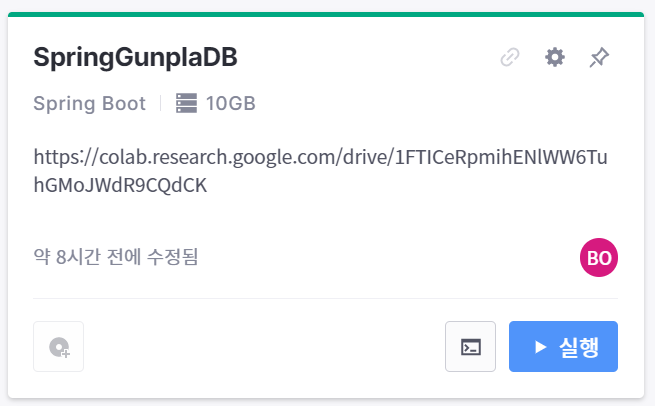

* 자동 실행 스크립트
>     sudo service mysql start

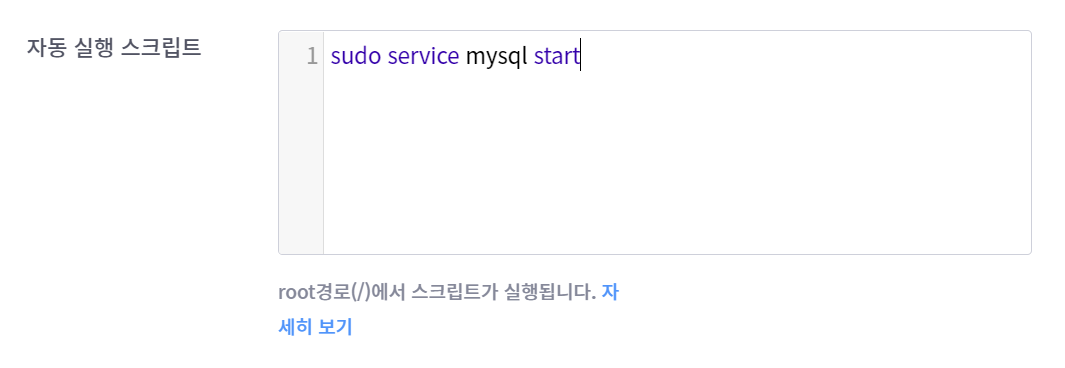

## MySQL Console 실행

* 터미널에서 mysql 시작
>     service mysql start

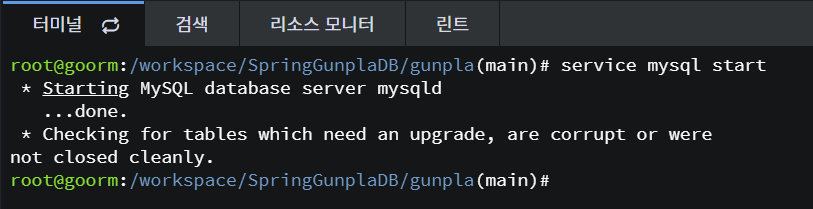

* mysql console 실행
* 처음 컨테이너 생성하여 패스워드 없으므로 -p 없이 실행
  >     mysql -uroot
* Goorm IDE에서 컨테이너 새로 만들면 root 패스워드 없음




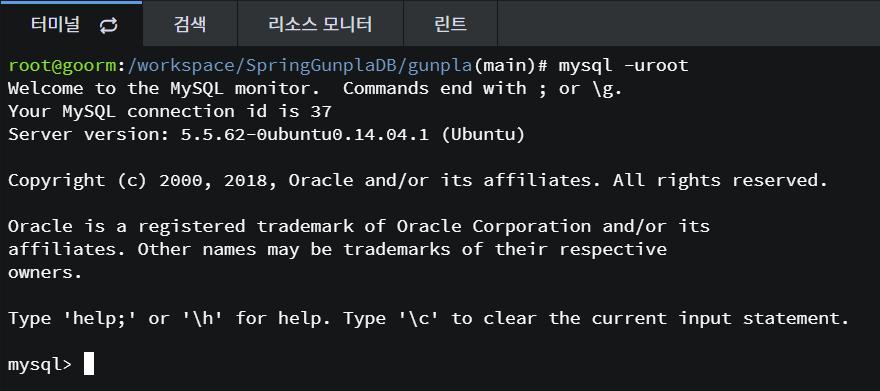

* database.sql 파일 내용 Ctrl+A,C 터미널에서 붙여 넣기

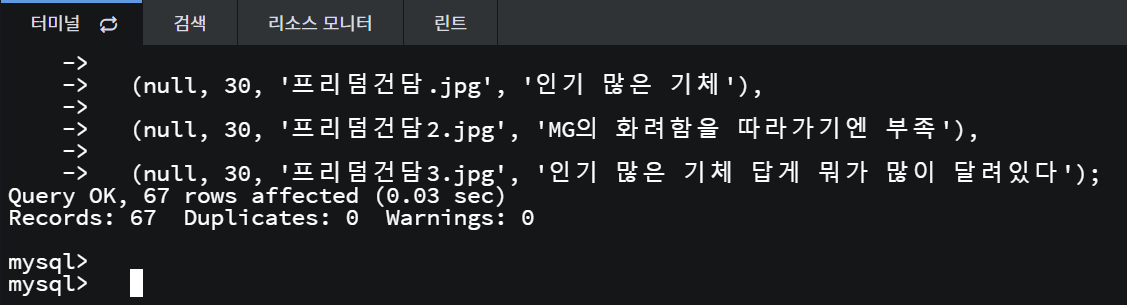

# Spring Boot 프로젝트 생성

## Spring Initializer

* Spring Initializer를 사용하여 프로젝트 생성
> https://start.spring.io/


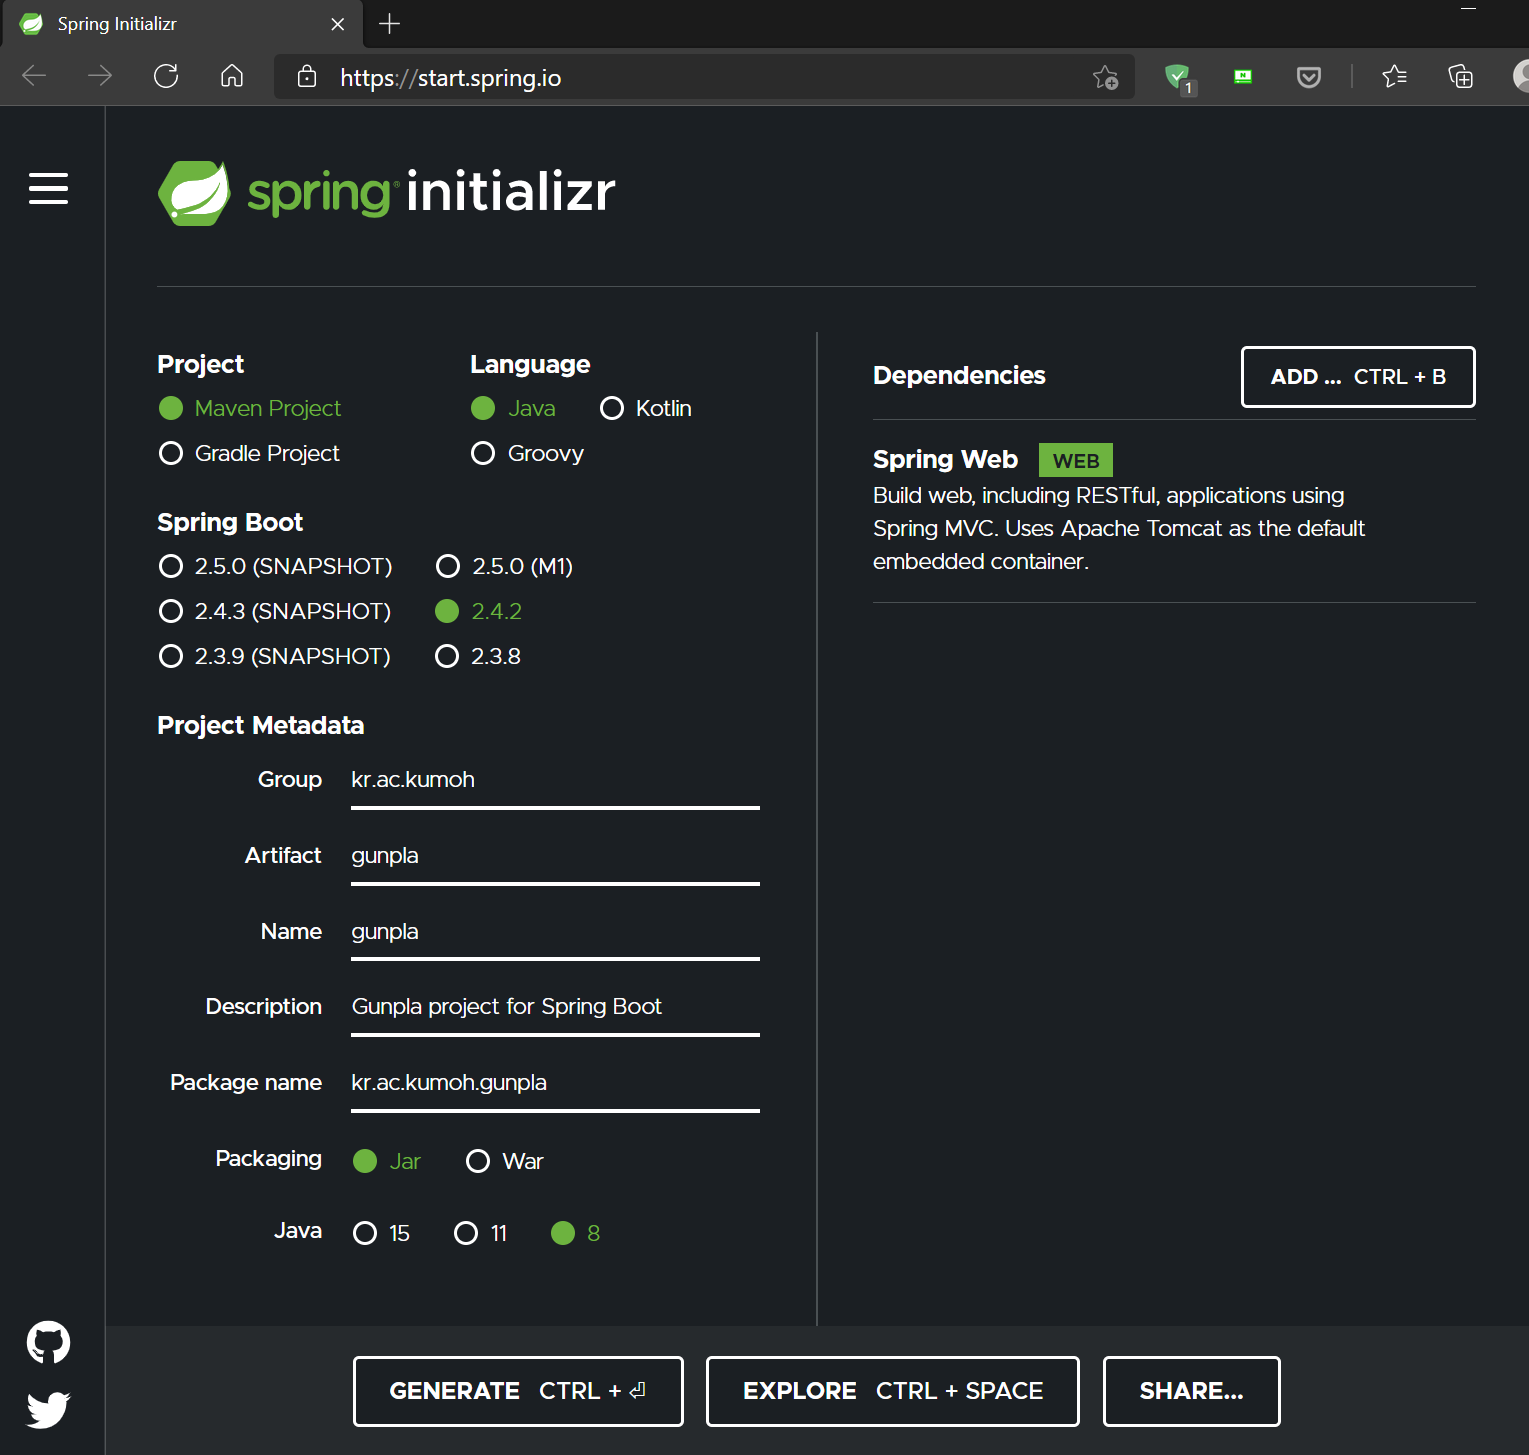

* 오른쪽 ADD... 버튼 눌러서 Spring Web 추가

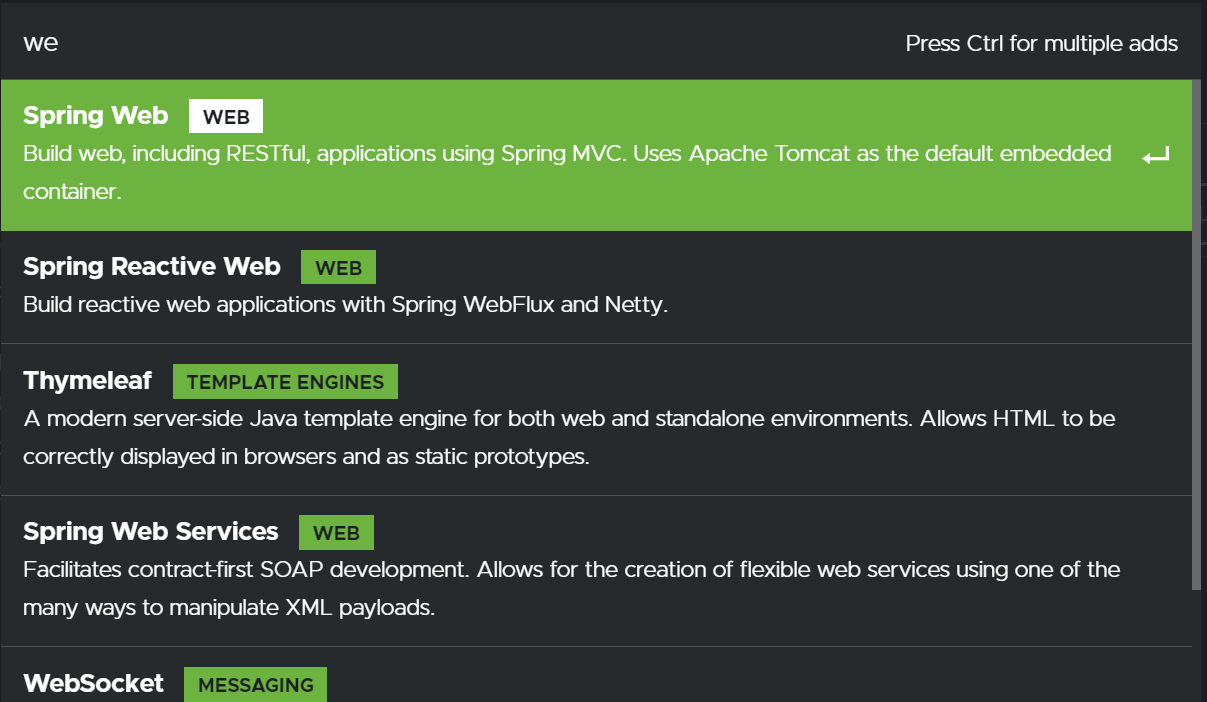

* Generate 버튼 눌러서 zip 파일 다운로드
* 압축해제 한 뒤에 Goorm IDE로 업로드
* 파일-가져오기-폴더 메뉴 선택


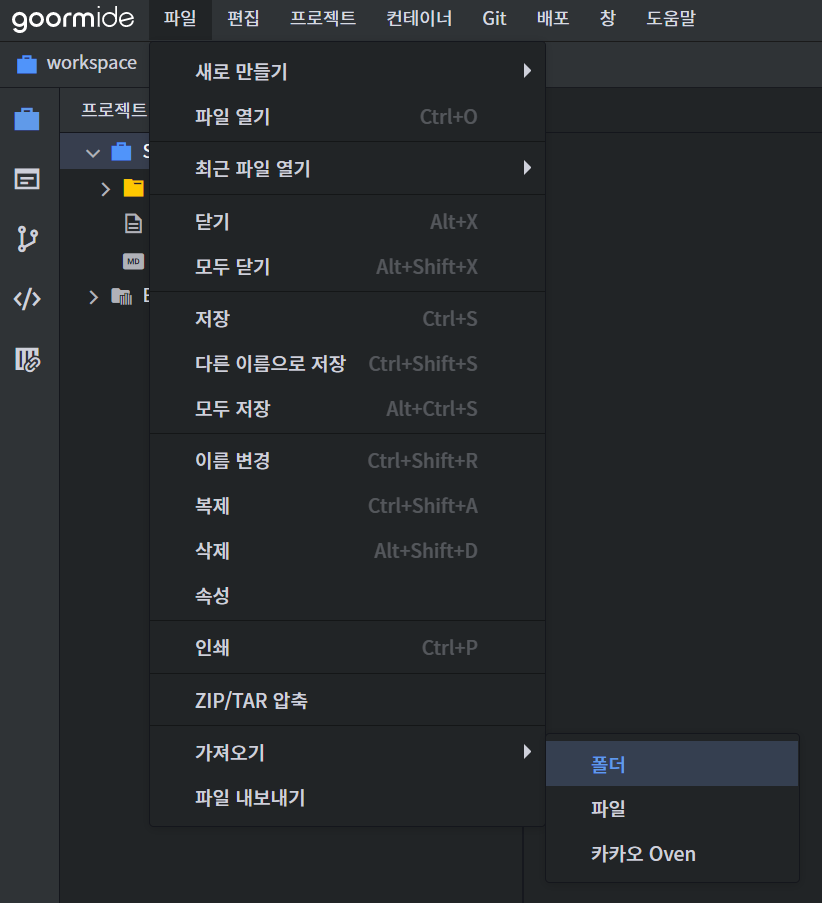

* 파일 선택 버튼 누르고 압축해제한 폴더 선택

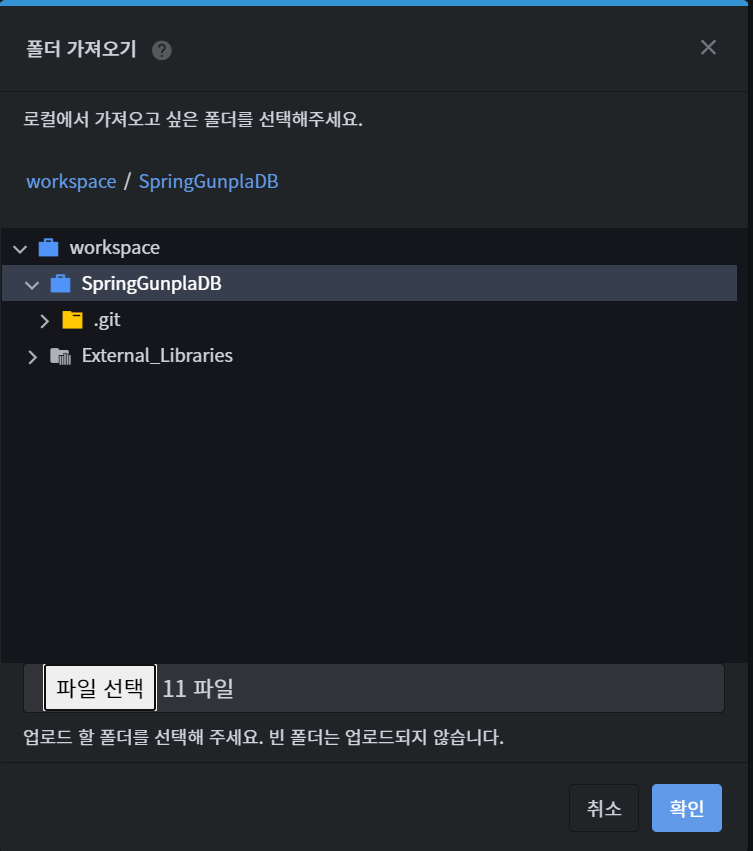

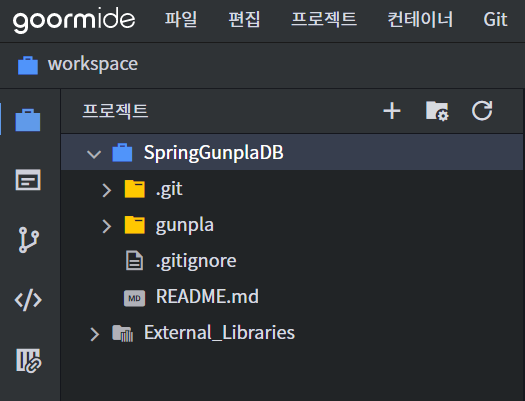

* java 폴더 아래 모두 열어 놔서 가장 안쪽 gunpla 폴더까지 이동
* ApiController.java 파일 생성

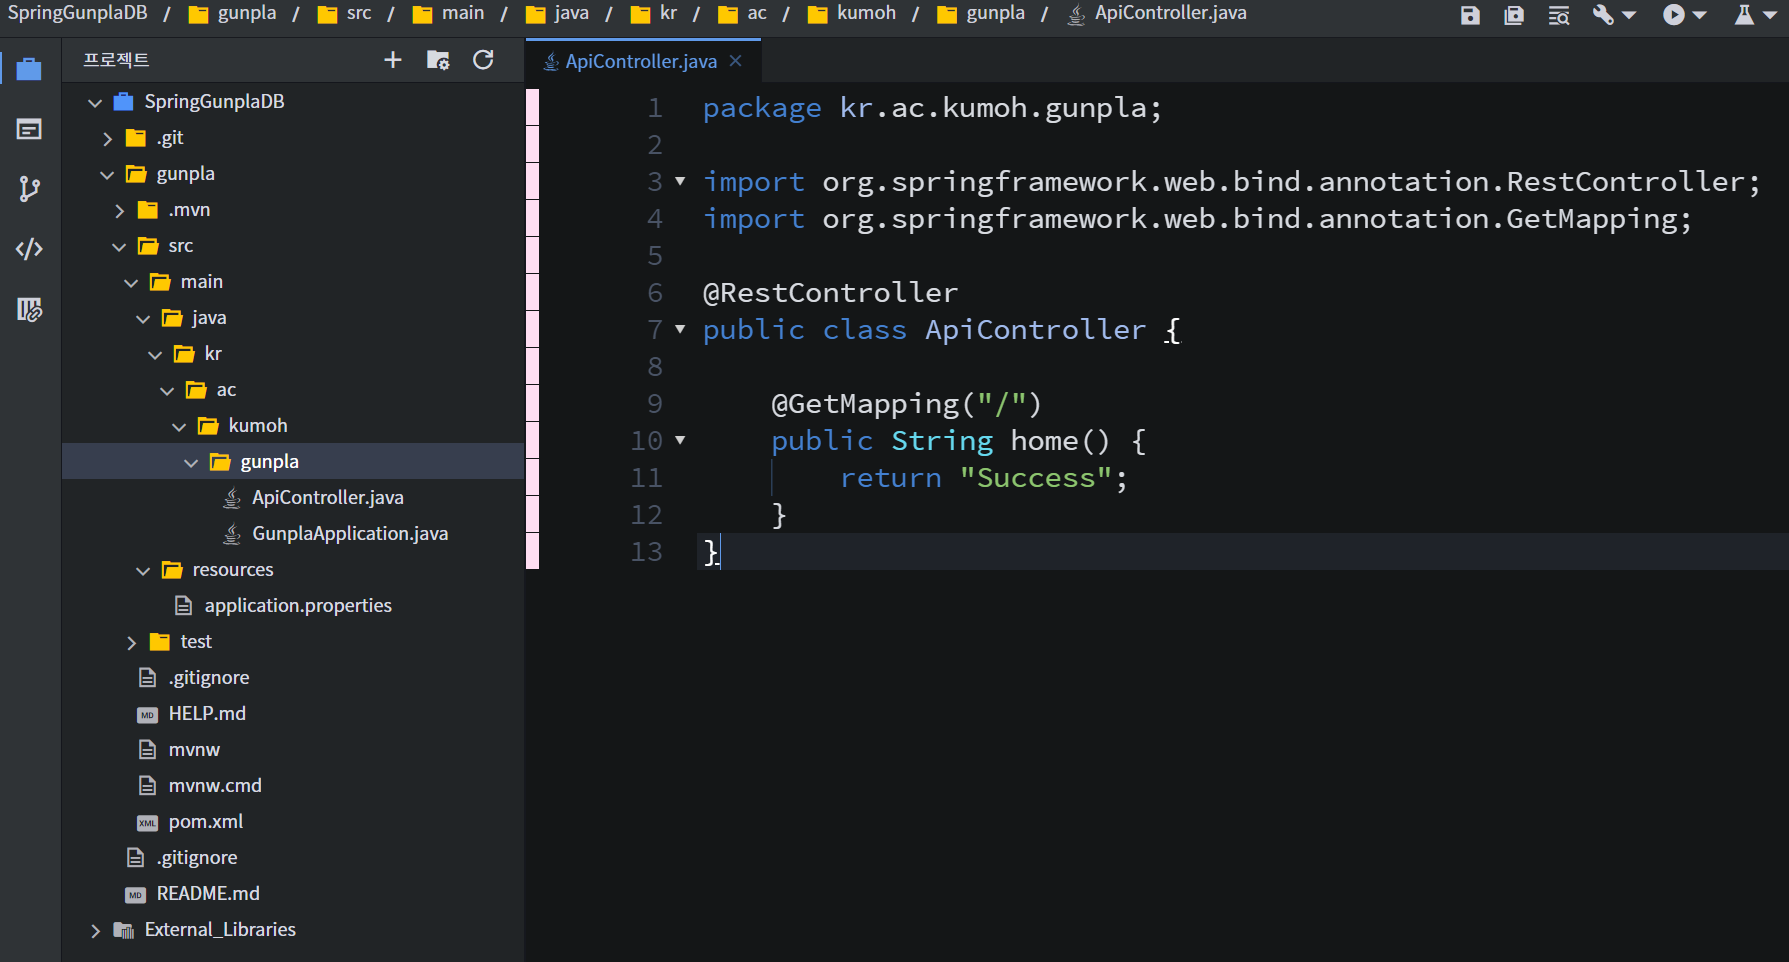

In [ ]:
package kr.ac.kumoh.gunpla;

import org.springframework.web.bind.annotation.RestController;
import org.springframework.web.bind.annotation.GetMapping;

@RestController
public class ApiController {

	@GetMapping("/")
	public String home() {
		return "Success";
	}
}

## 서버 실행

* 터미널에서 gunpla 디렉토리로 이동
* 다음 명령으로 서버 실행
>     mvn spring-boot:run

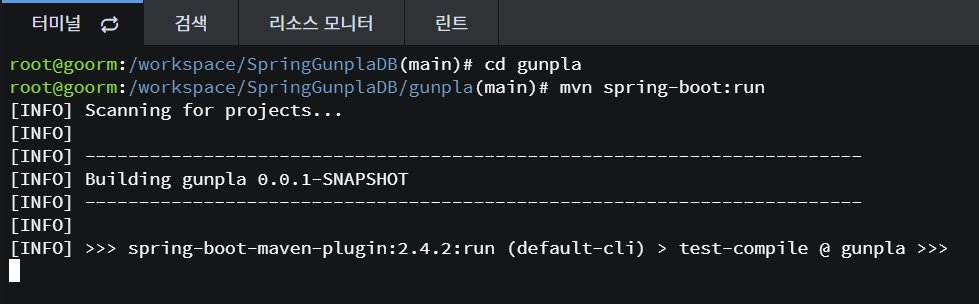

* 처음 수행시는 시간이 꽤 걸리니 기다릴 것
* 다음과 같이 나오면 서버 실행된 것임

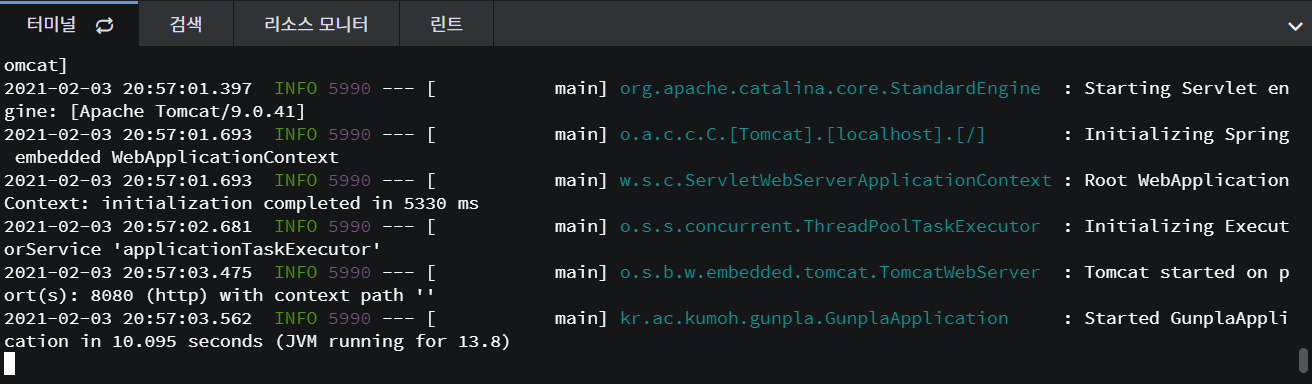

## Goorm IDE 서버 설정

* 프로젝트-실행 URL과 포트 메뉴 선택

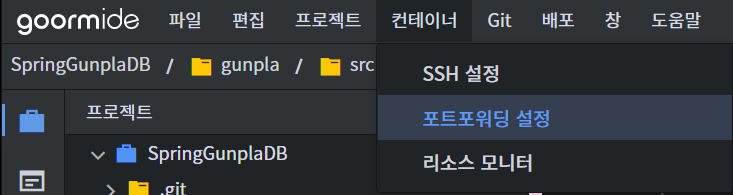

* 내부 포트에 8080 입력하고 등록 버튼 클릭
* IP 주소와 외부 포트는 그림과 다를 것임
* 오른쪽의 복사 아이콘 (네모 두개 겹친 것) 클릭

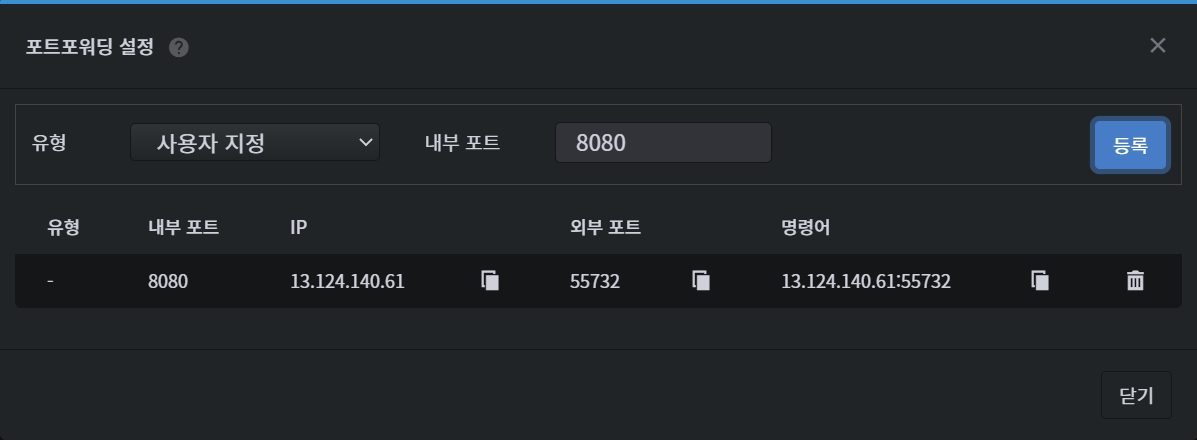

* 웹 브라우저 주소창에서 붙여 넣기 후 엔터

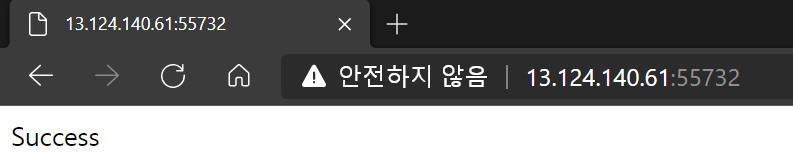

# MySQL 접속

## application.properties
* src/main/resources/application.properties 파일 변경

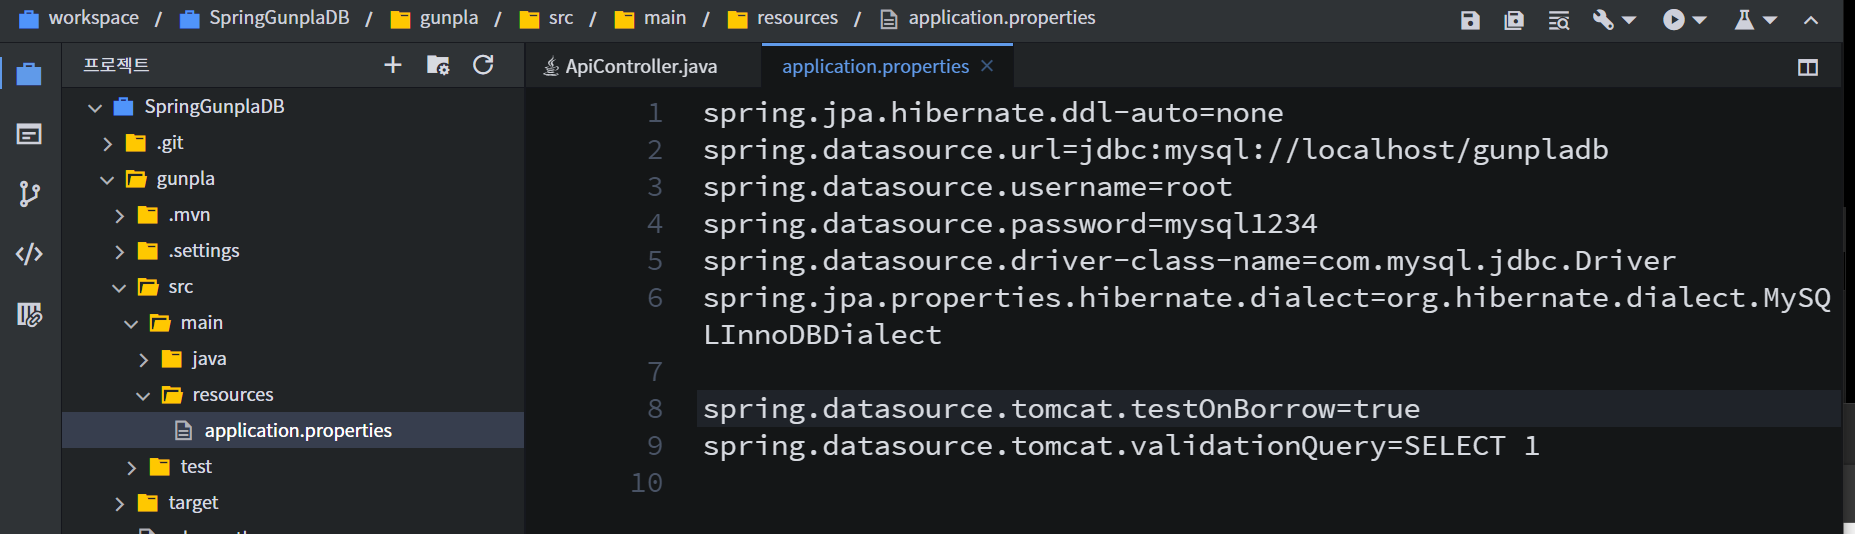

In [ ]:
spring.jpa.hibernate.ddl-auto=none
spring.datasource.url=jdbc:mysql://localhost:3306/gunpladb
spring.datasource.username=root
spring.datasource.password=mysql1234
spring.datasource.driver-class-name=com.mysql.jdbc.Driver
spring.jpa.properties.hibernate.dialect=org.hibernate.dialect.MySQLInnoDBDialect

spring.datasource.tomcat.testOnBorrow=true        
spring.datasource.tomcat.validationQuery=SELECT 1 


## pom.xml
* gunpla/pom.xml 변경
* 31~46라인 추가
* 55~62라인 추가

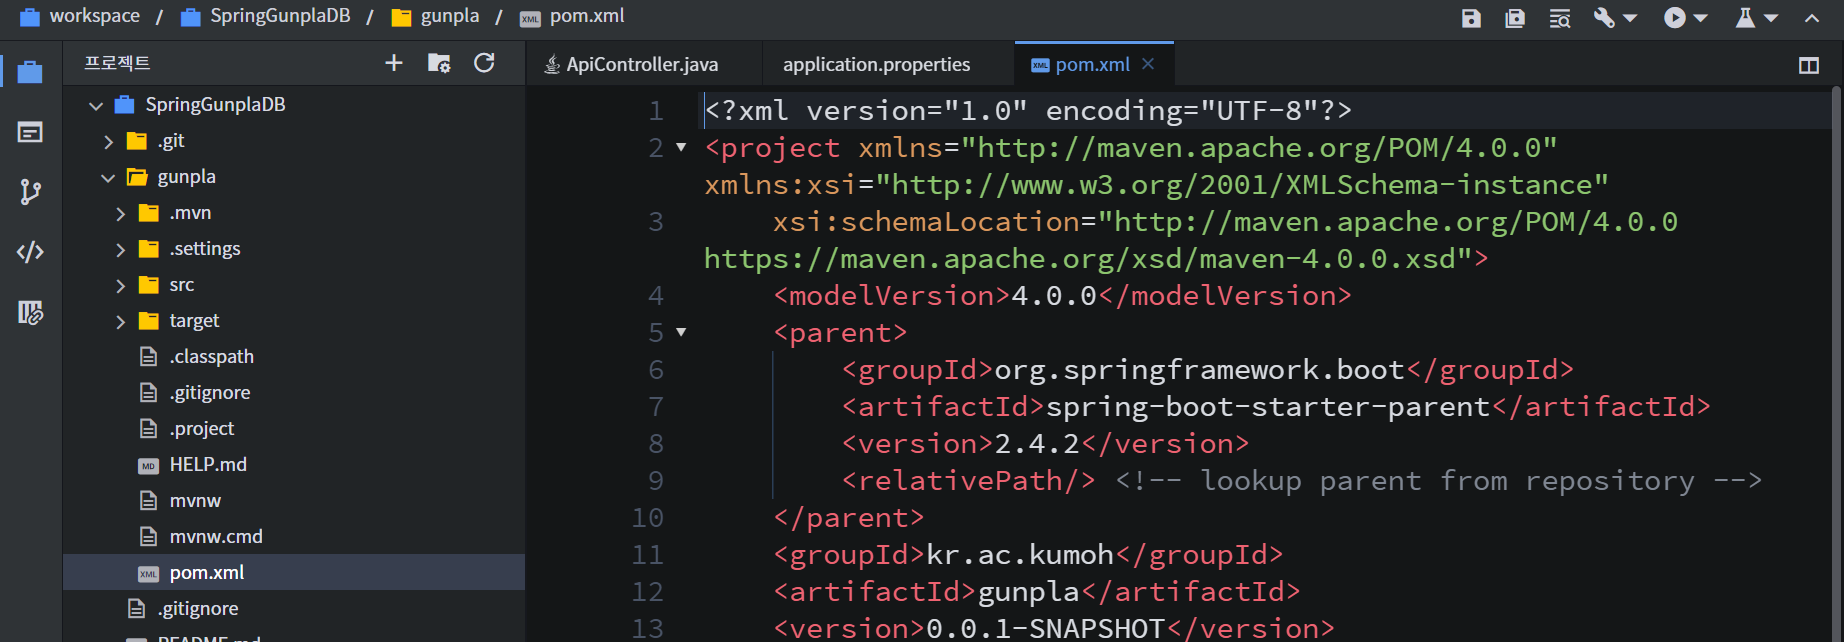

In [ ]:
<?xml version="1.0" encoding="UTF-8"?>
<project xmlns="http://maven.apache.org/POM/4.0.0" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
	xsi:schemaLocation="http://maven.apache.org/POM/4.0.0 https://maven.apache.org/xsd/maven-4.0.0.xsd">
	<modelVersion>4.0.0</modelVersion>
	<parent>
		<groupId>org.springframework.boot</groupId>
		<artifactId>spring-boot-starter-parent</artifactId>
		<version>2.4.2</version>
		<relativePath/> <!-- lookup parent from repository -->
	</parent>
	<groupId>kr.kumoh.ce</groupId>
	<artifactId>Performance</artifactId>
	<version>0.0.1-SNAPSHOT</version>
	<name>Performance</name>
	<description>Performance project for Spring Boot</description>
	<properties>
		<java.version>11</java.version>
	</properties>
	<dependencies>
		<dependency>
			<groupId>org.springframework.boot</groupId>
			<artifactId>spring-boot-starter-web</artifactId>
		</dependency>

		<dependency>
			<groupId>org.springframework.boot</groupId>
			<artifactId>spring-boot-starter-test</artifactId>
			<scope>test</scope>
		</dependency>

		<dependency>
			<groupId>org.springframework.boot</groupId>
			<artifactId>spring-boot-starter-data-jpa</artifactId>
		</dependency>

		<!-- https://mvnrepository.com/artifact/javax.persistence/javax.persistence-api -->
        <dependency>
            <groupId>javax.persistence</groupId>
            <artifactId>javax.persistence-api</artifactId>
            <version>2.2</version>
        </dependency>
		<dependency>
			<groupId>mysql</groupId>
			<artifactId>mysql-connector-java</artifactId>
			<version>5.1.31</version>
		</dependency>
	</dependencies>

	<build>
		<plugins>
			<plugin>
				<groupId>org.springframework.boot</groupId>
				<artifactId>spring-boot-maven-plugin</artifactId>
			</plugin>
			<plugin> 
				<groupId>org.apache.maven.plugins</groupId> 
				<artifactId>maven-surefire-plugin</artifactId> 
				<version>2.22.2</version> 
				<configuration> 
					<testFailureIgnore>true</testFailureIgnore> 
				</configuration> 
			</plugin>
		</plugins>
	</build>

</project>


* 저장 후 서버 다시 실행
* mysql console에 들어가 있다면 quit으로 종료
* 다음 명령으로 서버 실행
>     mvn spring-boot:run
* 오류 없는지 확인

# Mechanic

## Model

* Mechanic.java 파일 생성

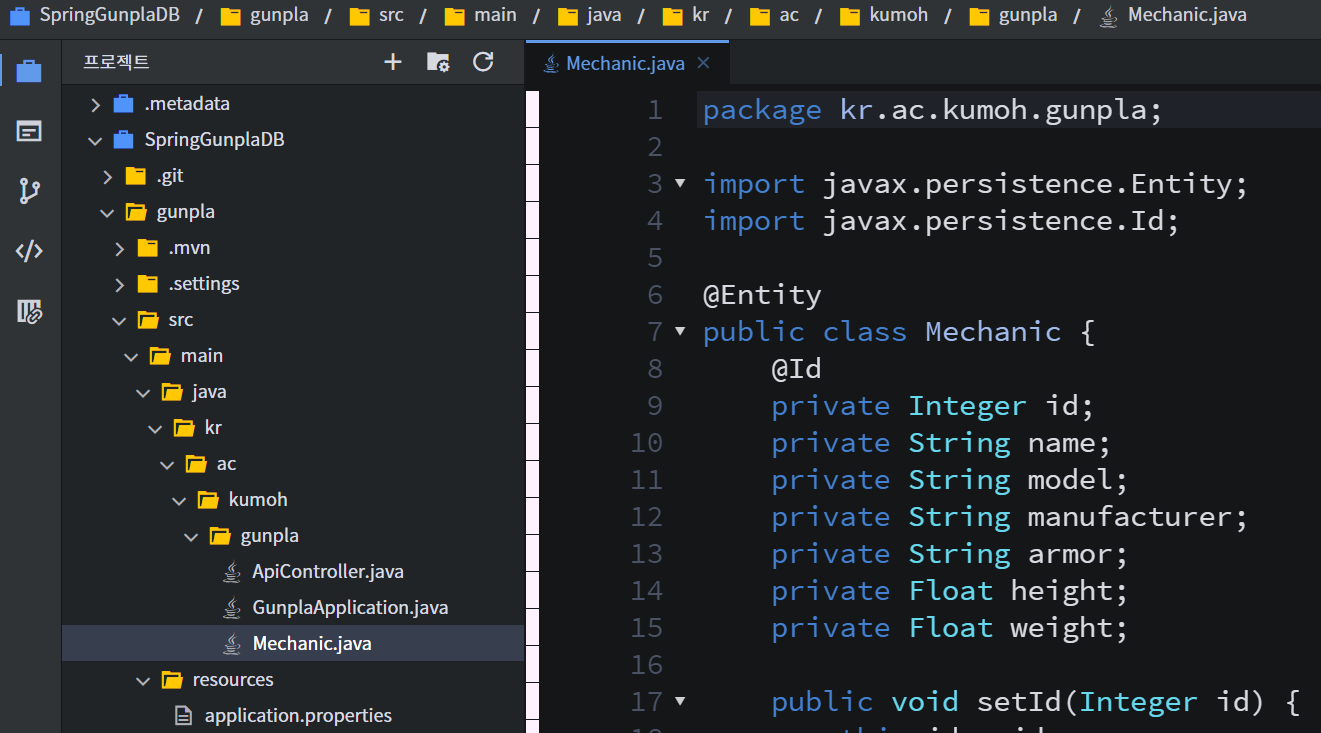

In [ ]:
package kr.ac.kumoh.gunpla;

import javax.persistence.Entity;
import javax.persistence.Id;

@Entity
public class Mechanic {
    @Id
    private Integer id;
    private String name;
    private String model;
    private String manufacturer;
    private String armor;
    private Float height;
    private Float weight;

    public void setId(Integer id) {
        this.id = id;
    }

    public void setName(String name) {
        this.name = name;
    }

    public void setModel(String model) {
        this.model = model;
    }

    public void setManufacturer(String manufacturer) {
        this.manufacturer = manufacturer;
    }

    public void setArmor(String armor) {
        this.armor = armor;
    }

    public void setHeight(Float height) {
        this.height = height;
    }

    public void setWeight(Float weight) {
        this.weight = weight;
    }

    public Integer getId() {
        return id;
    }

    public String getName() {
        return name;
    }
    
    public String getModel() {
        return model;
    }
    
    public String getManufacturer() {
        return manufacturer;
    }
    
    public String getArmor() {
        return armor;
    }
    
    public Float getHeight() {
        return height;
    }
    
    public Float getWeight() {
        return weight;
    }
}

## Repository

* MechanicRepository.java 파일 생성

In [ ]:
package kr.ac.kumoh.gunpla;

import org.springframework.data.repository.CrudRepository;
import kr.ac.kumoh.gunpla.Mechanic;

// Spring이 mechanicRepository Bean으로 자동 생성
// 참고: https://spring.io/guides/gs/accessing-data-mysql/

public interface MechanicRepository 
    extends CrudRepository<Mechanic, Integer> {
}

## Controller

* ApiController.java 파일 변경

In [ ]:
package kr.ac.kumoh.gunpla;

import org.springframework.web.bind.annotation.RestController;
import org.springframework.web.bind.annotation.GetMapping;
import org.springframework.beans.factory.annotation.Autowired;
import org.springframework.web.bind.annotation.ResponseBody;

@RestController
public class ApiController {

    @Autowired 
    private MechanicRepository mechanicRepository;
    
	// @GetMapping("/")
	// public String home() {
	// 	return "Success";
	// }
    
    @GetMapping(path="/mechanic")
    public @ResponseBody Iterable<Mechanic> getAllMechanic() {
		return mechanicRepository.findAll();
	}
}

* Ctrl+C로 서버 종료
* 서버 재실행 (키보드의 화살표 위 방향)
>     mvn spring-boot:run

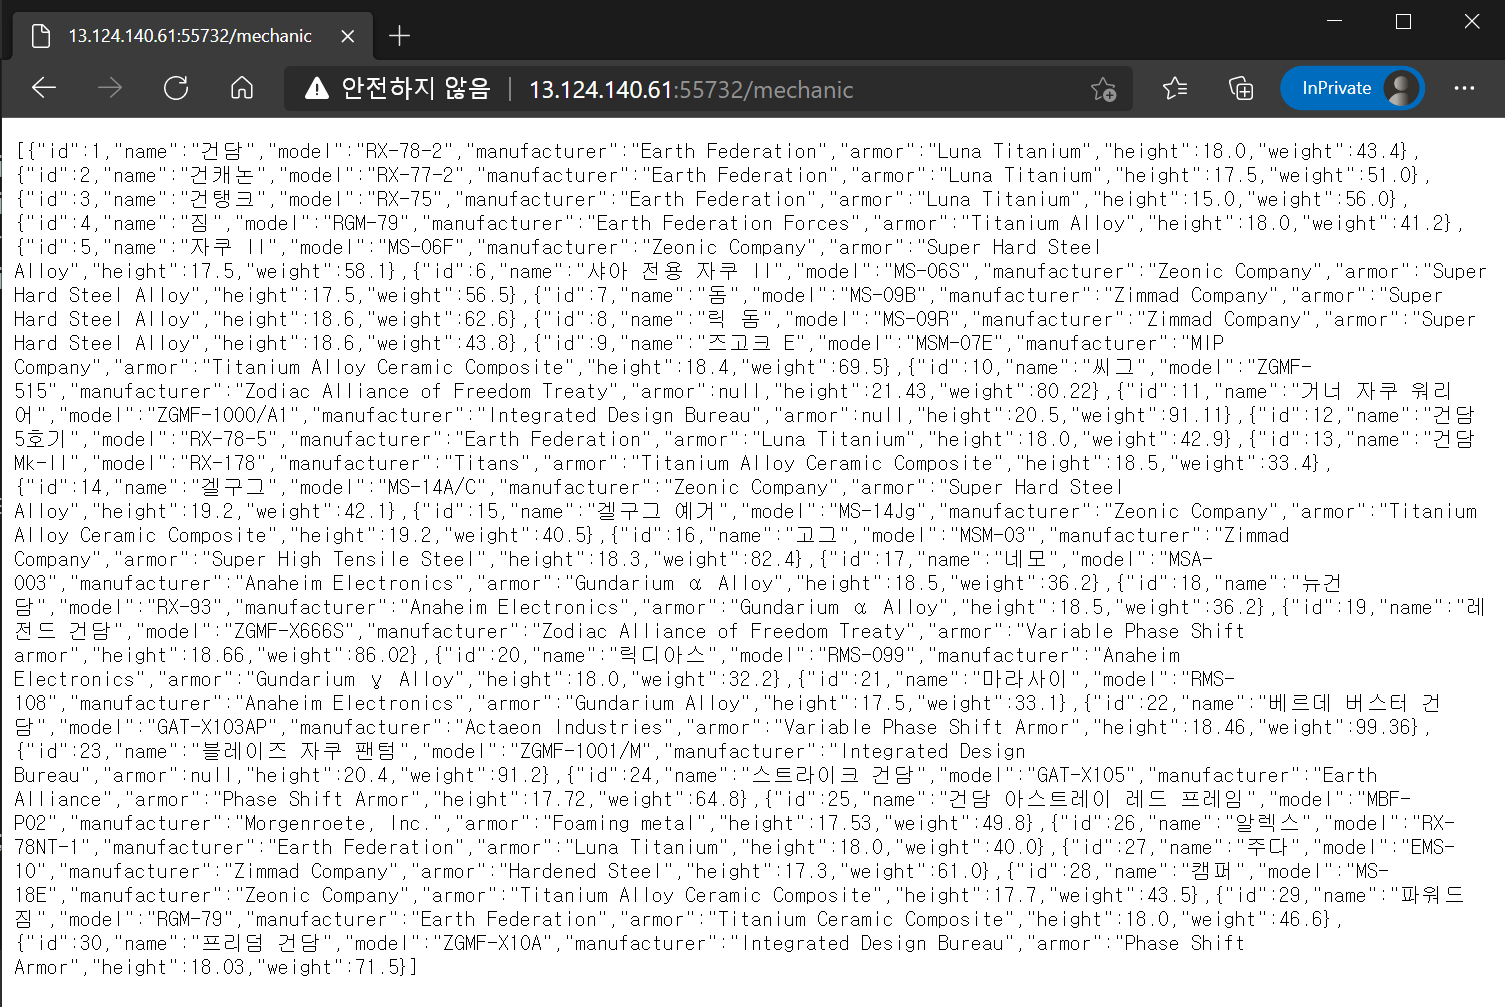

# HTML Table

## Thymeleaf 추가

* pom.xml 파일에 추가
* 47~50라인

        <dependency>
            <groupId>org.springframework.boot</groupId>
            <artifactId>spring-boot-starter-thymeleaf</artifactId>
        </dependency>

In [ ]:
<?xml version="1.0" encoding="UTF-8"?>
<project xmlns="http://maven.apache.org/POM/4.0.0" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
	xsi:schemaLocation="http://maven.apache.org/POM/4.0.0 https://maven.apache.org/xsd/maven-4.0.0.xsd">
	<modelVersion>4.0.0</modelVersion>
	<parent>
		<groupId>org.springframework.boot</groupId>
		<artifactId>spring-boot-starter-parent</artifactId>
		<version>2.4.2</version>
		<relativePath/> <!-- lookup parent from repository -->
	</parent>
	<groupId>kr.ac.kumoh</groupId>
	<artifactId>gunpla</artifactId>
	<version>0.0.1-SNAPSHOT</version>
	<name>gunpla</name>
	<description>Gunpla project for Spring Boot</description>
	<properties>
		<java.version>1.8</java.version>
	</properties>
	<dependencies>
		<dependency>
			<groupId>org.springframework.boot</groupId>
			<artifactId>spring-boot-starter-web</artifactId>
		</dependency>

		<dependency>
			<groupId>org.springframework.boot</groupId>
			<artifactId>spring-boot-starter-test</artifactId>
			<scope>test</scope>
		</dependency>
        
        <dependency>
			<groupId>org.springframework.boot</groupId>
			<artifactId>spring-boot-starter-data-jpa</artifactId>
		</dependency>

		<!-- https://mvnrepository.com/artifact/javax.persistence/javax.persistence-api -->
        <dependency>
            <groupId>javax.persistence</groupId>
            <artifactId>javax.persistence-api</artifactId>
            <version>2.2</version>
        </dependency>
		<dependency>
			<groupId>mysql</groupId>
			<artifactId>mysql-connector-java</artifactId>
			<version>5.1.31</version>
		</dependency>
        <dependency>
            <groupId>org.springframework.boot</groupId>
            <artifactId>spring-boot-starter-thymeleaf</artifactId>
        </dependency>
	</dependencies>

	<build>
		<plugins>
			<plugin>
				<groupId>org.springframework.boot</groupId>
				<artifactId>spring-boot-maven-plugin</artifactId>
			</plugin>
            <plugin> 
				<groupId>org.apache.maven.plugins</groupId> 
				<artifactId>maven-surefire-plugin</artifactId> 
				<version>2.22.2</version> 
				<configuration> 
					<testFailureIgnore>true</testFailureIgnore> 
				</configuration> 
			</plugin>
		</plugins>
	</build>

</project>


## Templates 디렉토리 생성

* resource 밑에 templates 디렉토리 생성

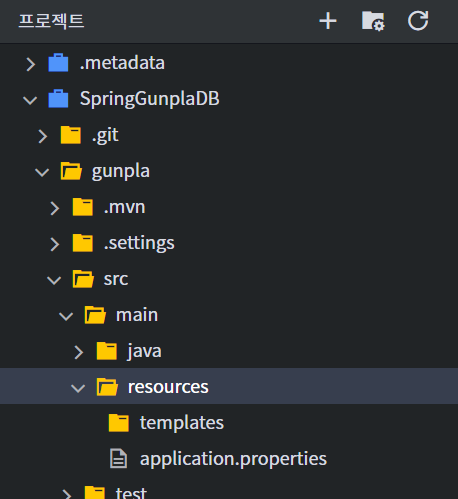

* templates 디렉토리에 index.html 파일 생성

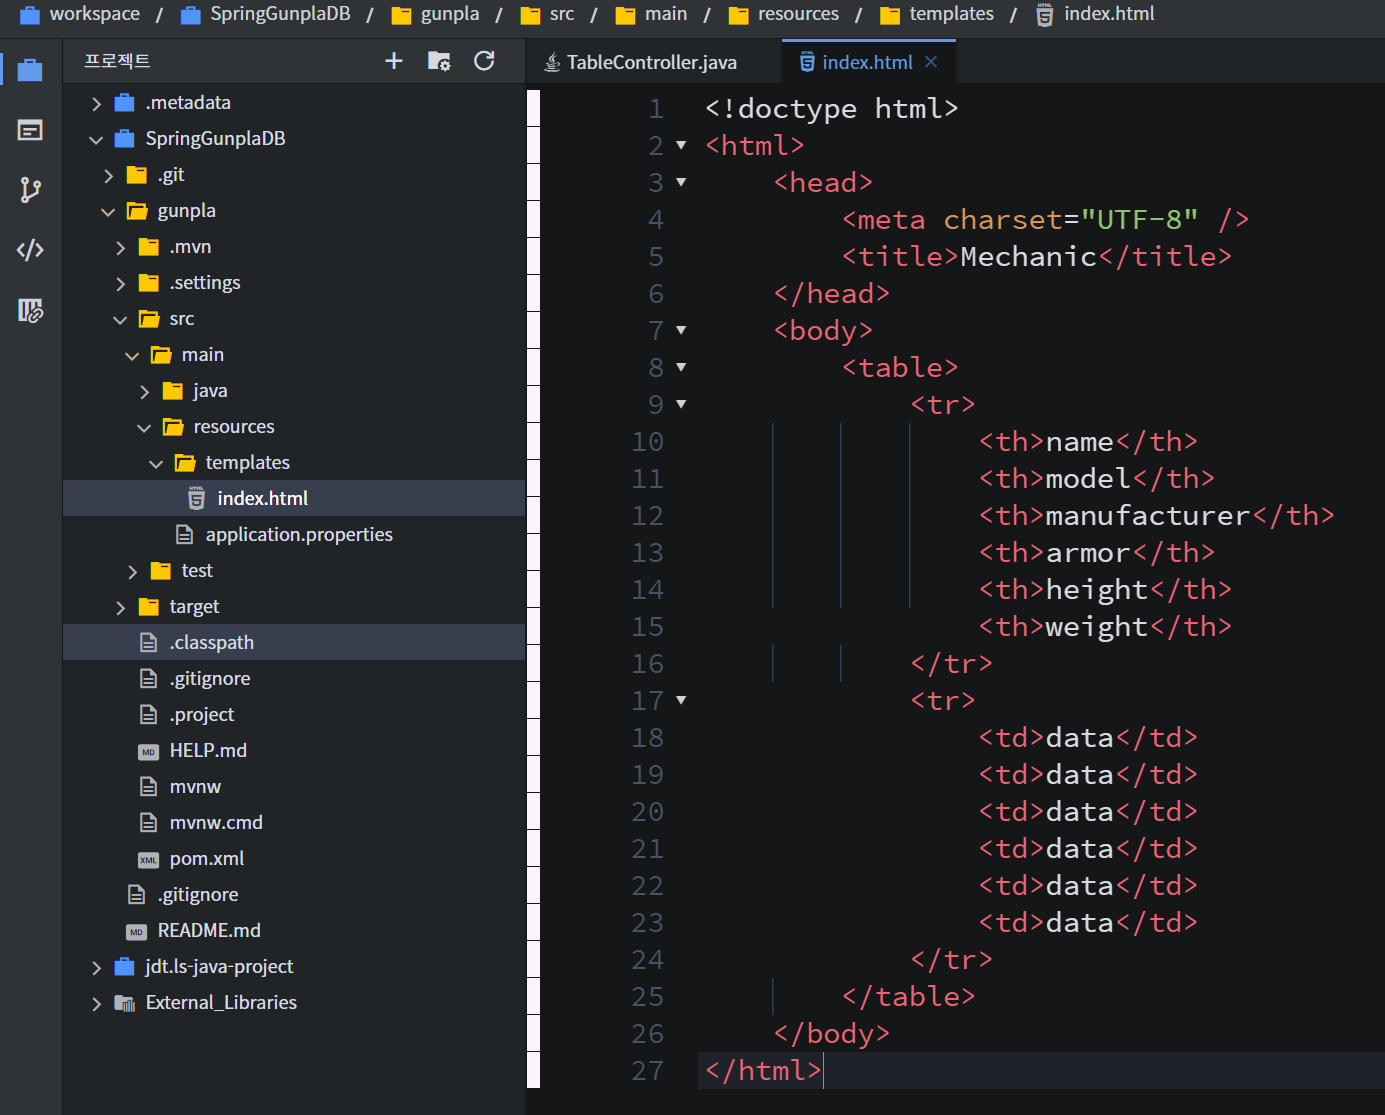

In [ ]:
<!doctype html>
<html>
    <head>
        <meta charset="UTF-8" />
        <title>Gunpla</title>
    </head>
    <body>
        <table>
            <tr>
				<th>name</th>
				<th>model</th>
				<th>manufacturer</th>
				<th>armor</th>
				<th>height</th>
                <th>weight</th>
			</tr>
            <tr>
                <td>data</td>
                <td>data</td>
                <td>data</td>
                <td>data</td>
                <td>data</td>
                <td>data</td>
            </tr>
		</table>        
    </body>
</html>

* java 하위 디렉토리에 TableController.java 파일 생성

In [ ]:
package kr.ac.kumoh.gunpla;

import org.springframework.stereotype.Controller;
import org.springframework.web.bind.annotation.GetMapping;

@Controller
public class TableController {

	@GetMapping("/")
    public String table() {
        return "index";
	}
}

* 웹 브라우저에서 확인

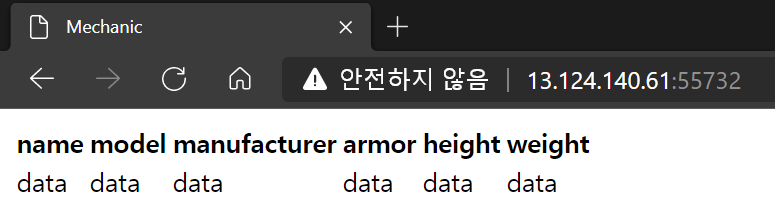

* TableController.java 파일 
* Debug를 위해 System.out.println() 사용할 때는 다음 명령으로 실행
>     mvn -X spring-boot:run

In [ ]:
package kr.ac.kumoh.gunpla;

import org.springframework.stereotype.Controller;
import org.springframework.web.bind.annotation.GetMapping;
import org.springframework.beans.factory.annotation.Autowired;
import org.springframework.ui.Model;

@Controller
public class TableController {
    
    @Autowired 
    private MechanicRepository mechanicRepository;
    
	@GetMapping("/")
    public String table(Model m) {
        Iterable<Mechanic> list = mechanicRepository.findAll();
        // for (Mechanic unit : list) {
        //     System.out.println(unit.getName());    
        // }
        
        m.addAttribute("mechanic", list);
        return "index";
	}
}

* index.html

In [ ]:
<!doctype html>
<html>
    <head>
        <meta charset="UTF-8" />
        <title>Mechanic</title>
    </head>
    <body>
        <table>
            <tr>
				<th>name</th>
				<th>model</th>
				<th>manufacturer</th>
				<th>armor</th>
				<th>height</th>
                <th>weight</th>
			</tr>
            <tr th:each="unit: ${mechanic}">
                <td th:text="${unit.name}">default</td>
                <td th:text="${unit.model}">default</td>
                <td th:text="${unit.manufacturer}">default</td>
                <td th:text="${unit.armor}">default</td>
                <td th:text="${unit.height}">default</td>
                <td th:text="${unit.weight}">default</td>
            </tr>
		</table>        
    </body>
</html>

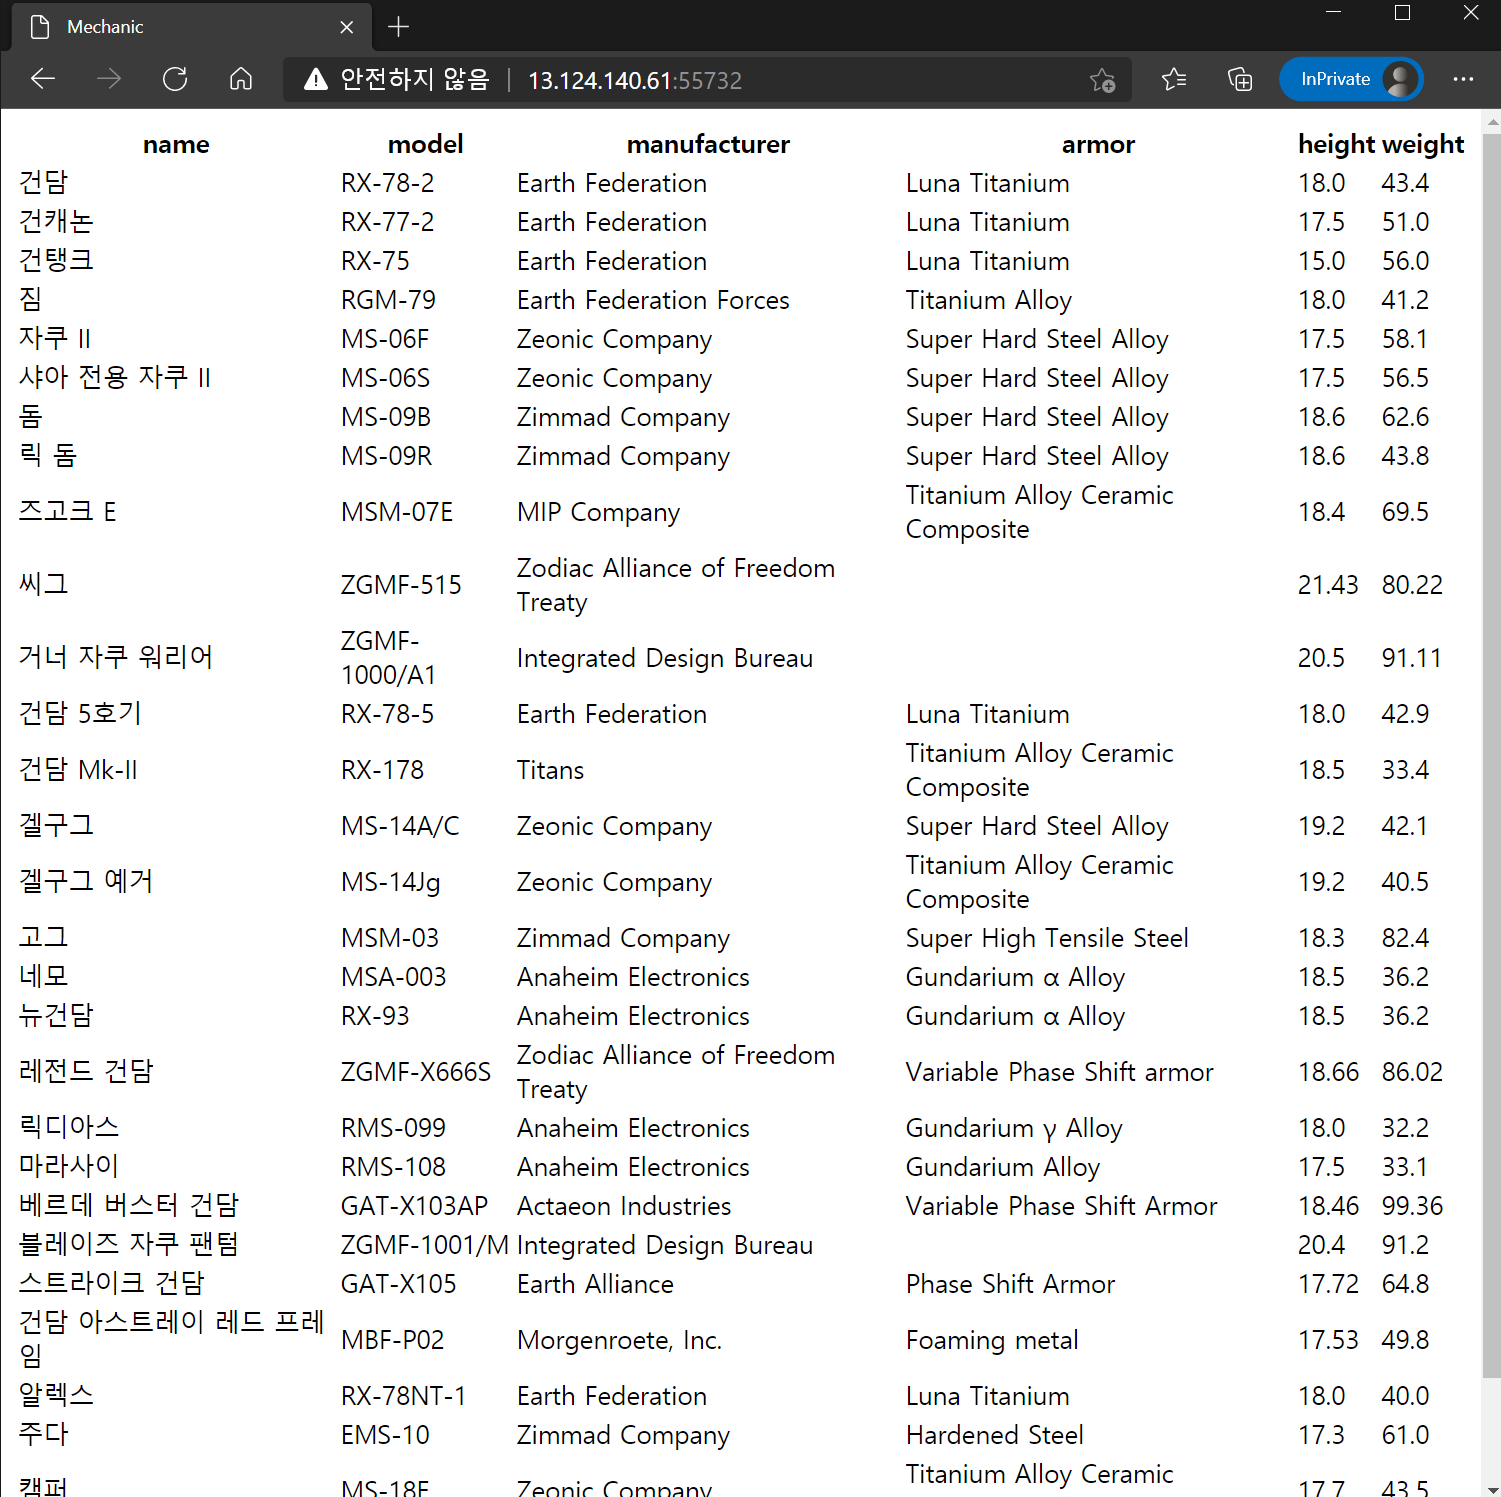

# CSS 적용

* static 디렉토리에 css 디렉토리 생성
* css에 styles.css 파일 생성

In [ ]:
h1 {
	text-align: center;	
}

table {
  font-family: Arial, Helvetica, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #ddd;
  padding: 8px;
}

tr:nth-child(even){ 
	background-color: #f2f2f2; 
}

tr:hover { 
	background-color: #eea; 
}

th {
  padding-top: 12px;
  padding-bottom: 12px;
  text-align: left;
  background-color: #4C4FAF;
  color: white;
}

.boxart {
	width: 80px;
	border-radius: 15%;
}

* index.html

In [ ]:
<!doctype html>
<html>
    <head>
        <meta charset="UTF-8" />
        <title>Mechanic</title>
        <link rel="stylesheet" type="text/css" href="/css/styles.css">
    </head>
    <body>
        <table>
            <tr>
				<th>name</th>
				<th>model</th>
				<th>manufacturer</th>
				<th>armor</th>
				<th>height</th>
                <th>weight</th>
			</tr>
            <tr th:each="unit: ${mechanic}">
                <td th:text="${unit.name}">default</td>
                <td th:text="${unit.model}">default</td>
                <td th:text="${unit.manufacturer}">default</td>
                <td th:text="${unit.armor}">default</td>
                <td th:text="${unit.height}">default</td>
                <td th:text="${unit.weight}">default</td>
            </tr>
		</table>        
    </body>
</html>

* 서버 다시 실행
>     mvn spring-boot:run

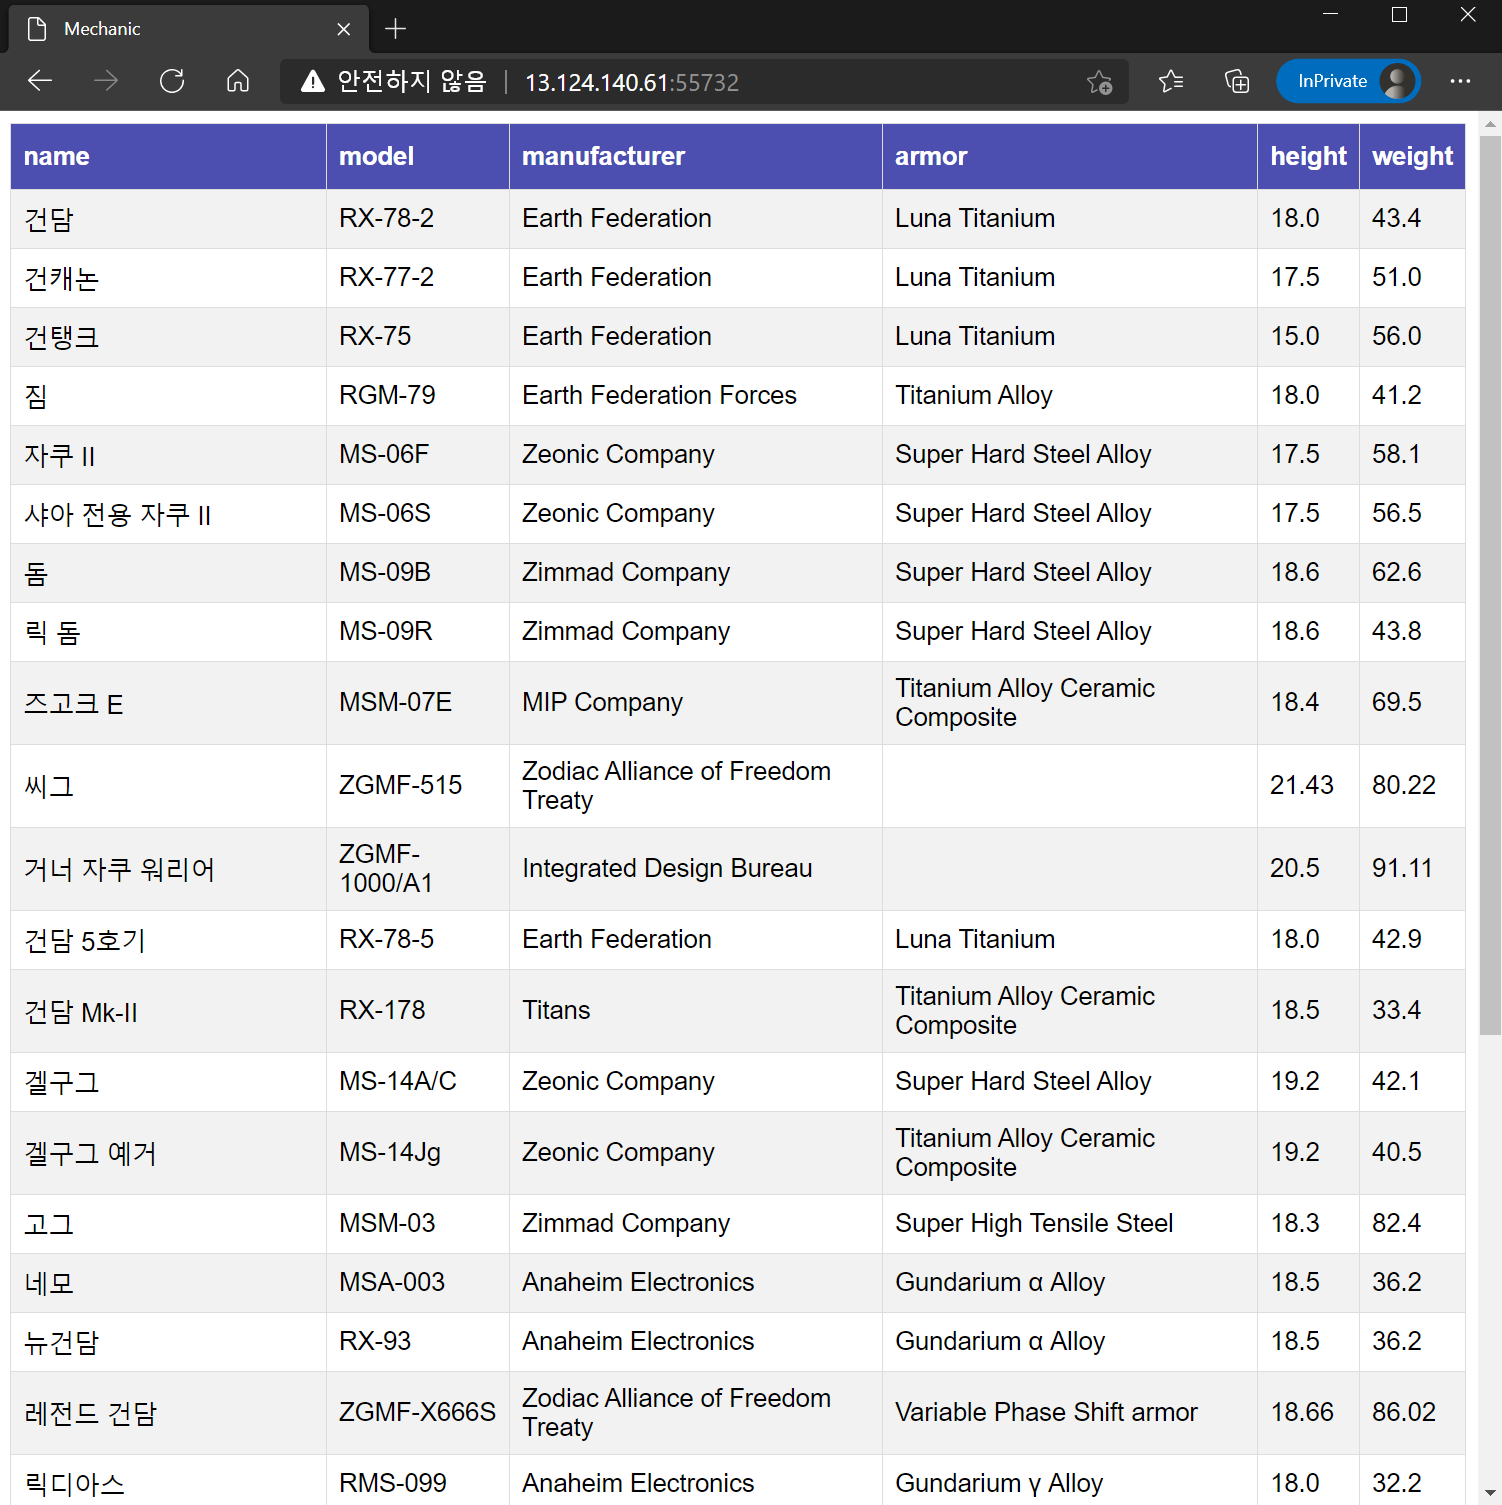